In [1]:
import pandas as pd
from sklearn import metrics
from sklearn import neighbors,svm
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import numpy as np
import lightgbm as lgb
import csv
from matplotlib import pylab as plt
%matplotlib inline








load train


In [2]:
import operator
from scipy import sparse
from sklearn.preprocessing import PolynomialFeatures
from sklearn import cross_validation
from sklearn.metrics import log_loss
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer,HashingVectorizer
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
import xgboost as xgb
import math

E:\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
import numpy as np
from sklearn import metrics
import bisect


def get_tpr_from_fpr(fpr_array, tpr_array, target):
    fpr_index = np.where(fpr_array == target)
    assert target <= 0.01, 'the value of fpr in the custom metric function need lt 0.01'
    if len(fpr_index[0]) > 0:
        return np.mean(tpr_array[fpr_index])
    else:
        tmp_index = bisect.bisect(fpr_array, target)
        fpr_tmp_1 = fpr_array[tmp_index-1]
        fpr_tmp_2 = fpr_array[tmp_index]
        if (target - fpr_tmp_1) > (fpr_tmp_2 - target):
            tpr_index = tmp_index
        else:
            tpr_index = tmp_index - 1
        return tpr_array[tpr_index]


def eval_metric(pred, dtrain):
    labels=dtrain.get_label()
    fpr, tpr, _ = metrics.roc_curve(labels, pred, pos_label=1)
    tpr1 = get_tpr_from_fpr(fpr, tpr, 0.001)
    tpr2 = get_tpr_from_fpr(fpr, tpr, 0.005)
    tpr3 = get_tpr_from_fpr(fpr, tpr, 0.01)
    return 0.4*tpr1 + 0.3*tpr2 + 0.3*tpr3

In [4]:
from sklearn.metrics import roc_curve 
def score(y,pred): 
    fpr, tpr, thresholds = roc_curve(y, pred, pos_label=1) 
    score=0.4*tpr[np.where(fpr>=0.001)[0][0]]+0.3*tpr[np.where(fpr>=0.005)[0][0]]+0.3*tpr[np.where(fpr>=0.01)[0][0]] 
    return score 

In [44]:
from sklearn.cross_validation import train_test_split 
'''
feature=[['f235', 0.24277271063415065, 0.5], ['f236', 0.23256584227052, 0.5], ['f234', 0.21852324880065013, 0.5], ['f238', 0.20669227663973286, 0.5], ['f237', 0.20567030143383547, 0.5], ['f215', 0.18003586190466467, 0.5], ['f7', 0.162332723652273, 0.5], ['f216', 0.1446281769584835, 0.5], ['f244', 0.13892783851103804, 0.5], ['f6', 0.13032218523874226, 0.5], ['f245', 0.1224749414492881, 0.5], ['f217', 0.11778605208130105, 0.5], ['f12', 0.11220688045867938, 0.5], ['f246', 0.0944845317959146, 0.5], ['f218', 0.0841674665273542, 0.5], ['f14', 0.07648252484818509, 0.5], ['f247', 0.05870535011692454, 0.5], ['f9', 0.054703167983445544, 0.5], ['f16', 0.054399978188648404, 0.5], ['f248', 0.054396213182353534, 0.5], ['f18', 0.053377355965473015, 0.5], ['f17', 0.05277656470300024, 0.5], ['f1', 0.048323215878311024, 0.5], ['f15', 0.04512025819443611, 0.5], ['f3', 0.033334950128024, 0.5], ['f243', 0.03116194081685024, 0.5], ['f242', 0.02845729625450647, 0.5], ['f253', 0.023578334266884604, 0.5], ['f11', 0.02343224272025608, 0.5], ['f250', 0.020784032759080837, 0.5], ['f4', 0.01995060944911291, 0.5], ['f241', 0.019680611801856637, 0.5], ['f240', 0.019468833516774347, 0.5], ['f252', 0.018630984649919094, 0.5], ['date', 0.018462271194602548, 0.5], ['f214', 0.017381164702992575, 0.5], ['f162', 0.01718247917779111, 0.5], ['f212', 0.01702770092843368, 0.5], ['f164', 0.01696777187422456, 0.5], ['f227', 0.016201156360754226, 0.5], ['f229', 0.016012814148916404, 0.5], ['f165', 0.015663417987175063, 0.5], ['f13', 0.015409398433251623, 0.5], ['f161', 0.015129186060917385, 0.5], ['f211', 0.01446420022336798, 0.5], ['f228', 0.013706938616999493, 0.5], ['f163', 0.013585267001421921, 0.5], ['f224', 0.01330379020966929, 0.5], ['f226', 0.012988463102088342, 0.5], ['f231', 0.012540905076059148, 0.5], ['f213', 0.012351265640991082, 0.5], ['f249', 0.01197224276917945, 0.5], ['f251', 0.011765270724995986, 0.5], ['f222', 0.011369904891302428, 0.5], ['f225', 0.011092105556587375, 0.5], ['f223', 0.011058827795219106, 0.5], ['f19', 0.010735071769281145, 0.5], ['f230', 0.009945204861347538, 0.5], ['f233', 0.009826605087938454, 0.5], ['f220', 0.009017478325812626, 0.5], ['f232', 0.008497838661735372, 0.5], ['f221', 0.00812703778627346, 0.5], ['f239', 0.007158846304609741, 0.5], ['f219', 0.004992909680328867, 0.5], ['f8', 0.0030139124544507705, 0.5], ['f2', 0.0009461512568509897, 0.5], ['f10', 0.00011296341219061222, 0.5]]
print len(feature)
feature=[['f261', 0.33029671565601293, 0.5], ['f260', 0.3256918087259907, 0.5], ['f259', 0.31760248730956275, 0.5], ['f262', 0.3084464625689011, 0.5], ['f264', 0.3041963844158335, 0.5], ['f271', 0.30097797868208404, 0.5], ['f265', 0.28776080074474697, 0.5], ['f270', 0.28751873987998744, 0.5], ['f263', 0.2760101410146563, 0.5], ['f266', 0.2656864100408039, 0.5], ['f235', 0.24277271063415065, 0.5], ['f204', 0.23975444749788635, 0.5], ['f236', 0.23256584227052, 0.5], ['f234', 0.21852324880065013, 0.5], ['f238', 0.20669227663973286, 0.5], ['f237', 0.20567030143383547, 0.5], ['f205', 0.2012304069895149, 0.5], ['f215', 0.18003586190466467, 0.5], ['f282', 0.1778345647631083, 0.5], ['f279', 0.17615169382462614, 0.5], ['f280', 0.1735188043708116, 0.5], ['f185', 0.17310082158890924, 0.5], ['f281', 0.1719725901849352, 0.5], ['f206', 0.16597615054025133, 0.5], ['f7', 0.162332723652273, 0.5], ['f5', 0.16066140709165044, 0.5], ['f31', 0.1583523257924094, 0.5], ['f30', 0.15785399326137475, 0.5], ['f184', 0.1510030619818684, 0.5], ['f210', 0.14830258889621756, 0.5], ['f216', 0.1446281769584835, 0.5], ['f244', 0.13892783851103804, 0.5], ['f292', 0.1311460861874161, 0.5], ['f6', 0.13032218523874226, 0.5], ['f278', 0.12865228772065992, 0.5], ['f291', 0.1264473027413392, 0.5], ['f183', 0.12598696397063203, 0.5], ['f29', 0.12408179484338454, 0.5], ['f245', 0.1224749414492881, 0.5], ['f28', 0.1220907170265826, 0.5], ['f25', 0.12185396668510393, 0.5], ['f288', 0.12152580105643564, 0.5], ['f209', 0.12110033379564805, 0.5], ['f52', 0.12064809718366401, 0.5], ['f24', 0.1197759400056249, 0.5], ['f54', 0.11974081344493727, 0.5], ['f27', 0.1192798407551253, 0.5], ['f217', 0.11778605208130105, 0.5], ['f53', 0.11668843442082216, 0.5], ['f207', 0.11303679541187028, 0.5], ['f26', 0.11262715447309721, 0.5], ['f12', 0.11220688045867938, 0.5], ['f192', 0.11166904718940875, 0.5], ['f193', 0.1092406872091875, 0.5], ['f55', 0.1087055633076366, 0.5], ['f191', 0.1067978076366178, 0.5], ['f203', 0.10609258422043565, 0.5], ['f269', 0.10525709907600397, 0.5], ['f198', 0.1045569149258525, 0.5], ['f202', 0.10444031998379756, 0.5], ['f258', 0.10338940508731749, 0.5], ['f289', 0.10289505644236875, 0.5], ['f197', 0.10243162344103808, 0.5], ['f295', 0.10220539864832512, 0.5], ['f290', 0.10161837418168125, 0.5], ['f23', 0.10089432492088636, 0.5], ['f208', 0.10058490598417756, 0.5], ['f287', 0.09884119716066825, 0.5], ['f171', 0.09874667628270627, 0.5], ['f182', 0.098419310585782, 0.5], ['f178', 0.09796041655203494, 0.5], ['f268', 0.09752601717418825, 0.5], ['f257', 0.09736030804508439, 0.5], ['f190', 0.09693387713836697, 0.5], ['f22', 0.09605622955475104, 0.5], ['f294', 0.09542769202583895, 0.5], ['f170', 0.09457535190394986, 0.5], ['f246', 0.0944845317959146, 0.5], ['f196', 0.09208113618253783, 0.5], ['f201', 0.09158404905534386, 0.5], ['f189', 0.09113585104655177, 0.5], ['f177', 0.09097951095107876, 0.5], ['f286', 0.08969558539371293, 0.5], ['f179', 0.0890766360380993, 0.5], ['f169', 0.08816998455282773, 0.5], ['f256', 0.08672909892748155, 0.5], ['f267', 0.08651489624380396, 0.5], ['f188', 0.08626570375368126, 0.5], ['f176', 0.08622975453524068, 0.5], ['f200', 0.08601213036661731, 0.5], ['f195', 0.08596828454145744, 0.5], ['f273', 0.08594555855375033, 0.5], ['f255', 0.08560827586391107, 0.5], ['f187', 0.08537577215914198, 0.5], ['f284', 0.0849704005402278, 0.5], ['f172', 0.08480597782826486, 0.5], ['f168', 0.08467757206371432, 0.5], ['f167', 0.08462565393082908, 0.5], ['f194', 0.08456918314911296, 0.5], ['f272', 0.08419423166659275, 0.5], ['f218', 0.0841674665273542, 0.5], ['f181', 0.08414832314255091, 0.5], ['f254', 0.0841362830008292, 0.5], ['f293', 0.08411310228420861, 0.5], ['f186', 0.0840798291494328, 0.5], ['f173', 0.08397061597596911, 0.5], ['f199', 0.0838438164647821, 0.5], ['f175', 0.08356909486338975, 0.5], ['f166', 0.08356360691507778, 0.5], ['f180', 0.08330551611471253, 0.5], ['f285', 0.08328763621608108, 0.5], ['f174', 0.08316884989081609, 0.5], ['f297', 0.08188051564608832, 0.5], ['f14', 0.07648252484818509, 0.5], ['f51', 0.07343907774716384, 0.5], ['f296', 0.07308733141757115, 0.5], ['f283', 0.07129804694972448, 0.5], ['f35', 0.06974768656022992, 0.5], ['f56', 0.06929521322397394, 0.5], ['f50', 0.06890433397867984, 0.5], ['f33', 0.06859021740630104, 0.5], ['f49', 0.06767099677762106, 0.5], ['f21', 0.06704136907002702, 0.5], ['f20', 0.06668239556629006, 0.5], ['f32', 0.0661886579465053, 0.5], ['f48', 0.06552948858769203, 0.5], ['f34', 0.06468940708924721, 0.5], ['f57', 0.060511793143733714, 0.5], ['f247', 0.05870535011692454, 0.5], ['f9', 0.054703167983445544, 0.5], ['f16', 0.054399978188648404, 0.5], ['f248', 0.054396213182353534, 0.5], ['f58', 0.054333426469621096, 0.5], ['f18', 0.053377355965473015, 0.5], ['f17', 0.05277656470300024, 0.5], ['f1', 0.048323215878311024, 0.5], ['f277', 0.04676142945807303, 0.5], ['f15', 0.04512025819443611, 0.5], ['f276', 0.04473680791620474, 0.5], ['f274', 0.04391347975224537, 0.5], ['f63', 0.03887945500678798, 0.5], ['f275', 0.038356129695047994, 0.5], ['f3', 0.033334950128024, 0.5], ['f62', 0.03253127337319326, 0.5], ['f243', 0.03116194081685024, 0.5], ['f242', 0.02845729625450647, 0.5], ['f61', 0.0241320625546105, 0.5], ['f253', 0.023578334266884604, 0.5], ['f11', 0.02343224272025608, 0.5], ['f250', 0.020784032759080837, 0.5], ['f4', 0.01995060944911291, 0.5], ['f241', 0.019680611801856637, 0.5], ['f240', 0.019468833516774347, 0.5], ['f252', 0.018630984649919094, 0.5], ['date', 0.018462271194602548, 0.5], ['f214', 0.017381164702992575, 0.5], ['f162', 0.01718247917779111, 0.5], ['f212', 0.01702770092843368, 0.5], ['f164', 0.01696777187422456, 0.5], ['f59', 0.016726084128679188, 0.5], ['f60', 0.01641419668203693, 0.5], ['f227', 0.016201156360754226, 0.5], ['f229', 0.016012814148916404, 0.5], ['f165', 0.015663417987175063, 0.5], ['f13', 0.015409398433251623, 0.5], ['f161', 0.015129186060917385, 0.5], ['f211', 0.01446420022336798, 0.5], ['f228', 0.013706938616999493, 0.5], ['f163', 0.013585267001421921, 0.5], ['f224', 0.01330379020966929, 0.5], ['f226', 0.012988463102088342, 0.5], ['f231', 0.012540905076059148, 0.5], ['f213', 0.012351265640991082, 0.5], ['f249', 0.01197224276917945, 0.5], ['f251', 0.011765270724995986, 0.5], ['f222', 0.011369904891302428, 0.5], ['f225', 0.011092105556587375, 0.5], ['f223', 0.011058827795219106, 0.5], ['f19', 0.010735071769281145, 0.5], ['f230', 0.009945204861347538, 0.5], ['f233', 0.009826605087938454, 0.5], ['f220', 0.009017478325812626, 0.5], ['f232', 0.008497838661735372, 0.5], ['f221', 0.00812703778627346, 0.5], ['f239', 0.007158846304609741, 0.5], ['f219', 0.004992909680328867, 0.5], ['f8', 0.0030139124544507705, 0.5], ['f2', 0.0009461512568509897, 0.5], ['f10', 0.00011296341219061222, 0.5]]
print len(feature)
s=map(lambda x:x[0],feature)[0:55]
'''
#去掉date
s=[ 'd', 'f7', 'f248', 'f238', 'f6', 'f237', 'f234', 'f215', 'f210', 'f236', 'f244', 'f247', 'f253', 'f218', 'f243', 'f245', 'f235', 'f246', 'f15', 'f5', 'f17', 'f82', 'f217', 'f216', 'f14', 'f18', 'f19', 'f252', 'f242', 'f4', 'f209', 'f164', 'f85', 'f106', 'f222', 'f84', 'f230', 'f241', 'f226', 'f220', 'f86', 'f11', 'f233', 'f240', 'f250', 'f249', 'f225', 'f204', 'f221', 'f224', 'f231', 'f214', 'f232', 'f239', 'f207', 'f223', 'f262', 'f266', 'f162', 'f208', 'f163', 'f229', 'f83', 'f263', 'f251', 'f81', 'f212', 'f228', 'f219', 'f227', 'f213', 'f101', 'f161', 'f8', 'f165', 'f34', 'f211', 'f30', 'f9', 'f31', 'f1', 'f13', 'f52', 'f260', 'f259', 'f205', 'f12', 'f3', 'f33', 'f58', 'f53', 'f206', 'f105', 'f265', 'f261', 'f57', 'f16', 'f270', 'f48', 'f279', 'f29', 'f264', 'f10', 'f80', 'f28', 'f291', 'f50', 'f55', 'f25', 'f26', 'f49', 'f290', 'f51', 'f54', 'f2', 'f35', 'f271', 'f63', 'f27', 'f284', 'f278', 'f184', 'f185', 'f100', 'f282', 'f32', 'y', 'f297', 'f289', 'f283', 'f103', 'f174', 'f79', 'f287', 'f56', 'f23', 'f192', 'f104', 'f285', 'f183', 'f22', 'f281', 'f99', 'f175', 'f296', 'f24', 'f181', 'f21', 'm', 'f286', 'f182', 'f75', 'f193', 'f62', 'f295', 'f73', 'f191', 'f178', 'f102', 'f91', 'f293', 'f78', 'f294', 'f97', 'f110', 'f76', 'f277', 'f275', 'f180', 'f177', 'f189', 'f77', 'f280', 'f134', 'f274', 'f90', 'f93', 'f142', 'f168', 'f257', 'f113', 'f179', 'f87', 'f143', 'f187', 'f276', 'f195', 'f199', 'f66', 'f254', 'f166', 'f107', 'f95', 'f70', 'f132', 'f202', 'f109', 'f20', 'f130', 'f128', 'f203', 'f292', 'f61', 'f288', 'f176', 'f171', 'f273', 'f197', 'f172', 'f255', 'f167', 'f96', 'f72', 'f256', 'f196', 'f151', 'f98', 'f89', 'f127', 'f173', 'f71', 'f64', 'f65', 'f201', 'f170', 'f74', 'f148', 'f140', 'f200', 'f124', 'f88', 'f144', 'f67', 'f188', 'f133', 'f198', 'f186', 'f146', 'f190', 'f126', 'f145', 'f267', 'f258', 'f268', 'f269', 'f131', 'f154', 'f108', 'f40', 'f125', 'f60', 'f169', 'f94', 'f129', 'f194', 'f112', 'f147', 'f120', 'f59', 'f139', 'f158', 'f68', 'f119', 'f92', 'f155', 'f159', 'f116', 'f141', 'f114', 'f123', 'f156', 'f136', 'f272', 'f117', 'f138', 'f121', 'f160', 'f118', 'f122', 'f69', 'f137', 'f149', 'f111', 'f150', 'f152', 'f42', 'f157', 'f115', 'f135', 'f153', 'f39', 'f45', 'f47', 'f36', 'f46', 'f38', 'f41', 'f43', 'f44', 'f37']
#s=[ 'y','m','d','f18', 'f17', 'f16', 'f15', 'f14', 'f13', 'f12', 'f11', 'f10', 'f9', 'f19', 'f7', 'f6', 'f4', 'f3', 'f2', 'f1', 'date', 'f8', 'f239', 'f238', 'f237', 'f233', 'f235', 'f234', 'f240', 'f232', 'f236', 'f241', 'f245', 'f243', 'f244', 'f246', 'f247', 'f248', 'f249', 'f250', 'f231', 'f251', 'f162', 'f230', 'f220', 'f228', 'f163', 'f164', 'f165', 'f211', 'f212', 'f213', 'f214', 'f215', 'f216', 'f229', 'f217', 'f219', 'f252', 'f221', 'f222', 'f223', 'f224', 'f225', 'f226', 'f227', 'f218', 'f253', 'f242', 'f161', 'f189', 'f190', 'f191', 'f192', 'f193', 'f194', 'f195', 'f196', 'f197', 'f198', 'f199', 'f200', 'f201', 'f202', 'f203', 'f204', 'f205', 'f206', 'f207', 'f188', 'f255', 'f187', 'f185', 'f166', 'f167', 'f168', 'f169', 'f170', 'f171', 'f172', 'f173', 'f174', 'f175', 'f176', 'f177', 'f178', 'f179', 'f180', 'f181', 'f182', 'f183', 'f184', 'f186', 'f209', 'f254', 'f273', 'f210', 'f272', 'f271', 'f270', 'f269', 'f268', 'f267', 'f266', 'f274', 'f265', 'f263', 'f262', 'f261', 'f260', 'f259', 'f258', 'f257', 'f256', 'f264', 'f275', 'f208', 'f277', 'f276', 'f20', 'f21', 'f23', 'f53', 'f52', 'f22', 'f283', 'f295', 'f278', 'f279', 'f280', 'f294', 'f293', 'f292', 'f291', 'f290', 'f289', 'f288', 'f281', 'f286', 'f285', 'f282', 'f284', 'f287', 'f297', 'f24', 'f25', 'f26', 'f27', 'f296', 'f5', 'f56', 'f55', 'f57', 'f58', 'f61', 'f60', 'f54', 'f62', 'f63', 'f59', 'f51', 'f49', 'f48', 'f50', 'f35', 'f34', 'f33', 'f32', 'f31', 'f30', 'f29', 'f28', 'f89', 'f85', 'f86', 'f87', 'f88', 'f90', 'f91', 'f93', 'f94', 'f95', 'f96', 'f97', 'f84', 'f92', 'f83', 'f64', 'f81', 'f80', 'f79', 'f78', 'f77', 'f76', 'f71', 'f70', 'f69', 'f68', 'f67', 'f66', 'f65', 'f98', 'f82', 'f99', 'f147', 'f101', 'f128', 'f129', 'f130', 'f131', 'f132', 'f100', 'f134', 'f135', 'f136', 'f137', 'f138', 'f139', 'f127', 'f140', 'f142', 'f143', 'f144', 'f145', 'f146', 'f148', 'f149', 'f150', 'f151', 'f152', 'f153', 'f154', 'f141', 'f126', 'f133', 'f124', 'f111', 'f112', 'f113', 'f114', 'f115', 'f116', 'f118', 'f119', 'f117', 'f121', 'f122', 'f123', 'f120', 'f125', 'f109', 'f155', 'f156', 'f157', 'f158', 'f107', 'f160', 'f108', 'f159', 'f110', 'f72', 'f73', 'f74', 'f75', 'f102', 'f103', 'f104', 'f105', 'f106', 'f42', 'f47', 'f46', 'f45', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f43', 'f44']
#s=['f210', 'f67', 'f68', 'f66', 'f69', 'f70', 'f154', 'f71', 'f120', 'f121', 'f152', 'f114', 'f113', 'f115', 'f151', 'f122', 'f153', 'f118', 'f116', 'f149', 'f117', 'f111', 'f119', 'f150', 'f112', 'f288', 'f289', 'f148', 'f290', 'f142', 'f143', 'f292', 'f106', 'f280', 'f281', 'f282', 'f64', 'f75', 'f73', 'f293', 'f294', 'f295', 'f279', 'f209', 'f144', 'f145', 'f297', 'f146', 'f130', 'f147', 'f110', 'f105', 'f287', 'f286', 'f285', 'f284', 'f134']
print (len(s))
s=s[0:70]
print (len(s))
print ("load train")
trainData= pd.read_csv('small_train.csv',header=0)
trainData=trainData[trainData.label!=-1]
#print ("load test")
#testData = pd.read_csv('test_set_b_0.csv',header=0)
trainData['y']=trainData['date']//1000
trainData['m']=trainData['date']//100%100
trainData['d']=trainData['date']%100
trainData=trainData.sort_values(by='date')
trainData=trainData.fillna(-1)
#trainData=trainData.loc[:,s].fillna(-1)

#testData=testData.fillna(0)

#test_x=np.array(testData.loc[:,s])
#train_x=trainData.loc[:,s]
#train_y=trainData.loc[:,'label']



300
70
load train


In [36]:
#trainData.head(15)

In [37]:
#

In [38]:
#eval_X.head(-1)

In [46]:
rate=0.5


train_X=trainData.loc[:int(trainData.shape[0]*rate),:]
eval_X0=trainData.loc[int(trainData.shape[0]*rate):,:]
train_Y=train_X.label
del train_X['label']
eval_Y0=eval_X0.label
del eval_X0['label']
train_X1,eval_X,train_Y1,eval_Y = train_test_split(eval_X0,eval_Y0,test_size=0.5,random_state=0)
del eval_X0,eval_Y0
train_X,train_Y=train_X.append(train_X1),train_Y.append(train_Y1)
train_X=train_X.loc[:,s]
eval_X=eval_X.loc[:,s]
params = {'booster': 'gbtree',
              #'objective': 'multi:softmax',
              'objective': 'binary:logistic',
              'eval_metric': ['logloss','auc'],
              'gamma': 1,
              'min_child_weight': 1.5,
              'max_depth': 5,
              'lambda': 10,
              'subsample': 0.7,
              'colsample_bytree': 0.7,
              'colsample_bylevel': 0.7,
              'eta': 0.03,
              'tree_method': 'exact',
              'seed': 2017,
              'nthread': 12,
              }


plst = list(params.items())



xgb_train = xgb.DMatrix(train_X, label=train_Y,missing=-1)
xgb_val = xgb.DMatrix(eval_X,label=eval_Y,missing=-1)


# return 训练和验证的错误率
watchlist = [(xgb_train, 'train'),(xgb_val, 'val')]

print ("xgb.train")
# training model 
# early_stopping_rounds 当设置的迭代次数较大时，early_stopping_rounds 可在一定的迭代次数内准确率没有提升就停止训练
model = xgb.train(params, xgb_train,num_boost_round=10000,evals=watchlist,early_stopping_rounds=50)
'''
for i in range(len(preds_list)):
    if i==0:
        pre=preds_list[i]
        pre_v=model_list[i].predict(z,ntree_limit=model.best_iteration)
    else:
        pre=np.concatenate((pre,preds_list[i]),axis=0)
        pre_v=(pre_v+model_list[i].predict(z,ntree_limit=model.best_iteration))

pre_v=pre_v/len(preds_list)

loss_mean=np.mean(cv_scores)
print (loss_mean)
with open("result.txt", "a") as f:
    f.write(str(loss_mean) + "\n")

result=pre_v
out_df = pd.DataFrame(result)
out_df.columns = ["high", "medium", "low"]
out_df["listing_id"] = v.listing_id.values
out_df.to_csv("xgb_cv10_%s.csv" % str(loss_mean), index=False)


'''

xgb.train
[0]	train-logloss:0.670626	train-auc:0.903104	val-logloss:0.67041	val-auc:0.903423
Multiple eval metrics have been passed: 'val-auc' will be used for early stopping.

Will train until val-auc hasn't improved in 50 rounds.
[1]	train-logloss:0.649229	train-auc:0.922263	val-logloss:0.648957	val-auc:0.916811
[2]	train-logloss:0.62906	train-auc:0.930595	val-logloss:0.628891	val-auc:0.923179
[3]	train-logloss:0.610311	train-auc:0.932968	val-logloss:0.610039	val-auc:0.925484
[4]	train-logloss:0.591893	train-auc:0.937302	val-logloss:0.591284	val-auc:0.929819
[5]	train-logloss:0.574117	train-auc:0.946201	val-logloss:0.573547	val-auc:0.936069
[6]	train-logloss:0.557446	train-auc:0.947342	val-logloss:0.556724	val-auc:0.937603
[7]	train-logloss:0.541461	train-auc:0.948511	val-logloss:0.540804	val-auc:0.938829
[8]	train-logloss:0.526703	train-auc:0.947988	val-logloss:0.526111	val-auc:0.937952
[9]	train-logloss:0.512685	train-auc:0.949002	val-logloss:0.512321	val-auc:0.938635
[10]	train-lo

[96]	train-logloss:0.160772	train-auc:0.965511	val-logloss:0.166284	val-auc:0.957381
[97]	train-logloss:0.160011	train-auc:0.965617	val-logloss:0.1656	val-auc:0.957547
[98]	train-logloss:0.159262	train-auc:0.965688	val-logloss:0.164937	val-auc:0.957628
[99]	train-logloss:0.158518	train-auc:0.965752	val-logloss:0.164247	val-auc:0.957703
[100]	train-logloss:0.157814	train-auc:0.965871	val-logloss:0.163625	val-auc:0.957857
[101]	train-logloss:0.157161	train-auc:0.966041	val-logloss:0.163028	val-auc:0.957985
[102]	train-logloss:0.156456	train-auc:0.966123	val-logloss:0.162379	val-auc:0.958116
[103]	train-logloss:0.155783	train-auc:0.966226	val-logloss:0.161797	val-auc:0.958206
[104]	train-logloss:0.155192	train-auc:0.966286	val-logloss:0.161256	val-auc:0.958414
[105]	train-logloss:0.15457	train-auc:0.966402	val-logloss:0.160662	val-auc:0.958505
[106]	train-logloss:0.15394	train-auc:0.966527	val-logloss:0.160066	val-auc:0.958771
[107]	train-logloss:0.153379	train-auc:0.966677	val-logloss:0.

[192]	train-logloss:0.128985	train-auc:0.97273	val-logloss:0.139378	val-auc:0.964456
[193]	train-logloss:0.128897	train-auc:0.972756	val-logloss:0.139306	val-auc:0.964475
[194]	train-logloss:0.128689	train-auc:0.972839	val-logloss:0.139159	val-auc:0.964527
[195]	train-logloss:0.128569	train-auc:0.972885	val-logloss:0.139036	val-auc:0.964571
[196]	train-logloss:0.128442	train-auc:0.972931	val-logloss:0.138939	val-auc:0.9646
[197]	train-logloss:0.12833	train-auc:0.97297	val-logloss:0.138842	val-auc:0.964619
[198]	train-logloss:0.128206	train-auc:0.973005	val-logloss:0.138727	val-auc:0.964664
[199]	train-logloss:0.128072	train-auc:0.97304	val-logloss:0.138629	val-auc:0.964672
[200]	train-logloss:0.127963	train-auc:0.973073	val-logloss:0.138553	val-auc:0.964673
[201]	train-logloss:0.127826	train-auc:0.973116	val-logloss:0.138488	val-auc:0.964672
[202]	train-logloss:0.127739	train-auc:0.973154	val-logloss:0.138421	val-auc:0.964712
[203]	train-logloss:0.127629	train-auc:0.97319	val-logloss:0

[288]	train-logloss:0.118942	train-auc:0.976473	val-logloss:0.13256	val-auc:0.967481
[289]	train-logloss:0.118852	train-auc:0.976508	val-logloss:0.132544	val-auc:0.967484
[290]	train-logloss:0.118806	train-auc:0.976539	val-logloss:0.132485	val-auc:0.967547
[291]	train-logloss:0.118747	train-auc:0.976563	val-logloss:0.132453	val-auc:0.967557
[292]	train-logloss:0.118681	train-auc:0.976582	val-logloss:0.132402	val-auc:0.967573
[293]	train-logloss:0.11855	train-auc:0.976632	val-logloss:0.132299	val-auc:0.967628
[294]	train-logloss:0.118464	train-auc:0.976669	val-logloss:0.13225	val-auc:0.967649
[295]	train-logloss:0.118411	train-auc:0.976689	val-logloss:0.132228	val-auc:0.967642
[296]	train-logloss:0.11831	train-auc:0.976733	val-logloss:0.132188	val-auc:0.967664
[297]	train-logloss:0.118229	train-auc:0.976786	val-logloss:0.132096	val-auc:0.967732
[298]	train-logloss:0.118133	train-auc:0.976821	val-logloss:0.132049	val-auc:0.967755
[299]	train-logloss:0.118056	train-auc:0.976855	val-loglos

[384]	train-logloss:0.112016	train-auc:0.979316	val-logloss:0.128364	val-auc:0.969706
[385]	train-logloss:0.11197	train-auc:0.979331	val-logloss:0.128343	val-auc:0.969708
[386]	train-logloss:0.111937	train-auc:0.979348	val-logloss:0.128339	val-auc:0.96971
[387]	train-logloss:0.111868	train-auc:0.979374	val-logloss:0.128319	val-auc:0.969721
[388]	train-logloss:0.111825	train-auc:0.979388	val-logloss:0.128278	val-auc:0.969738
[389]	train-logloss:0.111762	train-auc:0.979409	val-logloss:0.128237	val-auc:0.969755
[390]	train-logloss:0.111709	train-auc:0.979429	val-logloss:0.128225	val-auc:0.969758
[391]	train-logloss:0.111635	train-auc:0.979455	val-logloss:0.128176	val-auc:0.969782
[392]	train-logloss:0.111582	train-auc:0.979474	val-logloss:0.128151	val-auc:0.969794
[393]	train-logloss:0.111524	train-auc:0.979501	val-logloss:0.128142	val-auc:0.969792
[394]	train-logloss:0.111496	train-auc:0.97951	val-logloss:0.128127	val-auc:0.969799
[395]	train-logloss:0.11144	train-auc:0.979535	val-loglos

[480]	train-logloss:0.106482	train-auc:0.9815	val-logloss:0.125208	val-auc:0.971148
[481]	train-logloss:0.106431	train-auc:0.981521	val-logloss:0.125181	val-auc:0.971153
[482]	train-logloss:0.106383	train-auc:0.981534	val-logloss:0.125143	val-auc:0.971161
[483]	train-logloss:0.106342	train-auc:0.981549	val-logloss:0.125133	val-auc:0.971167
[484]	train-logloss:0.106302	train-auc:0.981565	val-logloss:0.125114	val-auc:0.97118
[485]	train-logloss:0.106277	train-auc:0.981577	val-logloss:0.125082	val-auc:0.971207
[486]	train-logloss:0.10625	train-auc:0.981586	val-logloss:0.125053	val-auc:0.971217
[487]	train-logloss:0.106194	train-auc:0.981618	val-logloss:0.12503	val-auc:0.971228
[488]	train-logloss:0.106134	train-auc:0.98164	val-logloss:0.125018	val-auc:0.971226
[489]	train-logloss:0.106063	train-auc:0.981661	val-logloss:0.124961	val-auc:0.97126
[490]	train-logloss:0.106008	train-auc:0.981683	val-logloss:0.12495	val-auc:0.97126
[491]	train-logloss:0.105967	train-auc:0.981699	val-logloss:0.1

[577]	train-logloss:0.101599	train-auc:0.983346	val-logloss:0.122722	val-auc:0.972265
[578]	train-logloss:0.101557	train-auc:0.983362	val-logloss:0.122661	val-auc:0.972298
[579]	train-logloss:0.10152	train-auc:0.983377	val-logloss:0.122663	val-auc:0.972295
[580]	train-logloss:0.101492	train-auc:0.983389	val-logloss:0.122636	val-auc:0.972306
[581]	train-logloss:0.101455	train-auc:0.9834	val-logloss:0.122585	val-auc:0.972326
[582]	train-logloss:0.101425	train-auc:0.983412	val-logloss:0.122577	val-auc:0.972333
[583]	train-logloss:0.101394	train-auc:0.983427	val-logloss:0.122567	val-auc:0.972334
[584]	train-logloss:0.101363	train-auc:0.983443	val-logloss:0.122554	val-auc:0.972335
[585]	train-logloss:0.101305	train-auc:0.983461	val-logloss:0.122521	val-auc:0.972342
[586]	train-logloss:0.101273	train-auc:0.983474	val-logloss:0.122494	val-auc:0.97235
[587]	train-logloss:0.101243	train-auc:0.983484	val-logloss:0.122487	val-auc:0.97235
[588]	train-logloss:0.101184	train-auc:0.983506	val-logloss

[673]	train-logloss:0.097772	train-auc:0.984726	val-logloss:0.120944	val-auc:0.973039
[674]	train-logloss:0.097751	train-auc:0.984731	val-logloss:0.120938	val-auc:0.973042
[675]	train-logloss:0.097706	train-auc:0.984745	val-logloss:0.120908	val-auc:0.973055
[676]	train-logloss:0.097674	train-auc:0.984757	val-logloss:0.120886	val-auc:0.973063
[677]	train-logloss:0.097651	train-auc:0.984765	val-logloss:0.120876	val-auc:0.973066
[678]	train-logloss:0.097613	train-auc:0.984774	val-logloss:0.120852	val-auc:0.973077
[679]	train-logloss:0.097563	train-auc:0.984791	val-logloss:0.120811	val-auc:0.973092
[680]	train-logloss:0.097544	train-auc:0.984799	val-logloss:0.120798	val-auc:0.973098
[681]	train-logloss:0.097493	train-auc:0.984816	val-logloss:0.120772	val-auc:0.973107
[682]	train-logloss:0.097455	train-auc:0.984826	val-logloss:0.120759	val-auc:0.97311
[683]	train-logloss:0.09743	train-auc:0.984834	val-logloss:0.120747	val-auc:0.973118
[684]	train-logloss:0.097353	train-auc:0.98487	val-loglo

[769]	train-logloss:0.094223	train-auc:0.985968	val-logloss:0.119387	val-auc:0.973781
[770]	train-logloss:0.0942	train-auc:0.985979	val-logloss:0.119381	val-auc:0.973788
[771]	train-logloss:0.094134	train-auc:0.986	val-logloss:0.11934	val-auc:0.973809
[772]	train-logloss:0.094093	train-auc:0.986015	val-logloss:0.119334	val-auc:0.973813
[773]	train-logloss:0.094051	train-auc:0.986027	val-logloss:0.119342	val-auc:0.973808
[774]	train-logloss:0.094022	train-auc:0.98604	val-logloss:0.119354	val-auc:0.973806
[775]	train-logloss:0.093997	train-auc:0.986048	val-logloss:0.119348	val-auc:0.973812
[776]	train-logloss:0.093963	train-auc:0.986057	val-logloss:0.119347	val-auc:0.973813
[777]	train-logloss:0.093933	train-auc:0.986064	val-logloss:0.119346	val-auc:0.973813
[778]	train-logloss:0.093901	train-auc:0.986073	val-logloss:0.119341	val-auc:0.973813
[779]	train-logloss:0.093869	train-auc:0.986083	val-logloss:0.119316	val-auc:0.973824
[780]	train-logloss:0.093857	train-auc:0.986089	val-logloss:0

[865]	train-logloss:0.091094	train-auc:0.987041	val-logloss:0.118104	val-auc:0.974386
[866]	train-logloss:0.091059	train-auc:0.987052	val-logloss:0.118089	val-auc:0.97439
[867]	train-logloss:0.091019	train-auc:0.987065	val-logloss:0.118063	val-auc:0.974402
[868]	train-logloss:0.090984	train-auc:0.987073	val-logloss:0.118046	val-auc:0.97441
[869]	train-logloss:0.09095	train-auc:0.987089	val-logloss:0.118031	val-auc:0.974409
[870]	train-logloss:0.090921	train-auc:0.987096	val-logloss:0.11802	val-auc:0.974411
[871]	train-logloss:0.090898	train-auc:0.987103	val-logloss:0.117992	val-auc:0.974424
[872]	train-logloss:0.090887	train-auc:0.987107	val-logloss:0.117987	val-auc:0.974423
[873]	train-logloss:0.090854	train-auc:0.987118	val-logloss:0.117967	val-auc:0.974446
[874]	train-logloss:0.090833	train-auc:0.987124	val-logloss:0.117967	val-auc:0.974446
[875]	train-logloss:0.090811	train-auc:0.98713	val-logloss:0.117963	val-auc:0.974449
[876]	train-logloss:0.090776	train-auc:0.98714	val-logloss:

[961]	train-logloss:0.088292	train-auc:0.987929	val-logloss:0.116963	val-auc:0.97484
[962]	train-logloss:0.08828	train-auc:0.987934	val-logloss:0.116964	val-auc:0.97484
[963]	train-logloss:0.08825	train-auc:0.987943	val-logloss:0.116946	val-auc:0.974847
[964]	train-logloss:0.088228	train-auc:0.987951	val-logloss:0.116941	val-auc:0.974847
[965]	train-logloss:0.08819	train-auc:0.987965	val-logloss:0.116923	val-auc:0.974857
[966]	train-logloss:0.088163	train-auc:0.987976	val-logloss:0.11691	val-auc:0.974862
[967]	train-logloss:0.088144	train-auc:0.987981	val-logloss:0.116893	val-auc:0.974865
[968]	train-logloss:0.088118	train-auc:0.987988	val-logloss:0.116888	val-auc:0.97486
[969]	train-logloss:0.088102	train-auc:0.987993	val-logloss:0.116892	val-auc:0.97486
[970]	train-logloss:0.088081	train-auc:0.987999	val-logloss:0.116882	val-auc:0.974867
[971]	train-logloss:0.088067	train-auc:0.988004	val-logloss:0.116868	val-auc:0.974875
[972]	train-logloss:0.088028	train-auc:0.988018	val-logloss:0.

[1057]	train-logloss:0.085661	train-auc:0.988769	val-logloss:0.115925	val-auc:0.975291
[1058]	train-logloss:0.08564	train-auc:0.988776	val-logloss:0.115902	val-auc:0.975299
[1059]	train-logloss:0.085613	train-auc:0.988789	val-logloss:0.115896	val-auc:0.975306
[1060]	train-logloss:0.085603	train-auc:0.988792	val-logloss:0.115879	val-auc:0.975315
[1061]	train-logloss:0.08556	train-auc:0.988808	val-logloss:0.115854	val-auc:0.975325
[1062]	train-logloss:0.08554	train-auc:0.988813	val-logloss:0.115856	val-auc:0.975328
[1063]	train-logloss:0.085506	train-auc:0.988825	val-logloss:0.115866	val-auc:0.975323
[1064]	train-logloss:0.085472	train-auc:0.988835	val-logloss:0.115842	val-auc:0.975335
[1065]	train-logloss:0.085462	train-auc:0.988838	val-logloss:0.115846	val-auc:0.975329
[1066]	train-logloss:0.085416	train-auc:0.988853	val-logloss:0.11584	val-auc:0.975336
[1067]	train-logloss:0.0854	train-auc:0.988859	val-logloss:0.115843	val-auc:0.975334
[1068]	train-logloss:0.085367	train-auc:0.988873	

[1152]	train-logloss:0.083166	train-auc:0.989539	val-logloss:0.115284	val-auc:0.975565
[1153]	train-logloss:0.083127	train-auc:0.989552	val-logloss:0.115258	val-auc:0.975581
[1154]	train-logloss:0.083093	train-auc:0.989565	val-logloss:0.115255	val-auc:0.975587
[1155]	train-logloss:0.083068	train-auc:0.989575	val-logloss:0.115246	val-auc:0.975593
[1156]	train-logloss:0.083057	train-auc:0.989579	val-logloss:0.115258	val-auc:0.975584
[1157]	train-logloss:0.083031	train-auc:0.989589	val-logloss:0.115255	val-auc:0.975585
[1158]	train-logloss:0.083014	train-auc:0.989592	val-logloss:0.115265	val-auc:0.97558
[1159]	train-logloss:0.082991	train-auc:0.989601	val-logloss:0.115271	val-auc:0.975579
[1160]	train-logloss:0.082972	train-auc:0.989608	val-logloss:0.115251	val-auc:0.975587
[1161]	train-logloss:0.082954	train-auc:0.989613	val-logloss:0.115251	val-auc:0.97559
[1162]	train-logloss:0.082932	train-auc:0.989618	val-logloss:0.115235	val-auc:0.975594
[1163]	train-logloss:0.08291	train-auc:0.9896

[1247]	train-logloss:0.08103	train-auc:0.990203	val-logloss:0.11474	val-auc:0.975825
[1248]	train-logloss:0.081016	train-auc:0.990205	val-logloss:0.114738	val-auc:0.975825
[1249]	train-logloss:0.080985	train-auc:0.990213	val-logloss:0.114719	val-auc:0.975832
[1250]	train-logloss:0.080952	train-auc:0.990221	val-logloss:0.114699	val-auc:0.975843
[1251]	train-logloss:0.080918	train-auc:0.990232	val-logloss:0.114696	val-auc:0.975841
[1252]	train-logloss:0.080907	train-auc:0.990236	val-logloss:0.114693	val-auc:0.975841
[1253]	train-logloss:0.080897	train-auc:0.990238	val-logloss:0.114686	val-auc:0.975846
[1254]	train-logloss:0.080873	train-auc:0.990247	val-logloss:0.114682	val-auc:0.975852
[1255]	train-logloss:0.080854	train-auc:0.990247	val-logloss:0.114669	val-auc:0.975856
[1256]	train-logloss:0.080836	train-auc:0.990253	val-logloss:0.114669	val-auc:0.975856
[1257]	train-logloss:0.080802	train-auc:0.990261	val-logloss:0.114652	val-auc:0.975859
[1258]	train-logloss:0.080779	train-auc:0.990

[1342]	train-logloss:0.078869	train-auc:0.990831	val-logloss:0.113998	val-auc:0.976157
[1343]	train-logloss:0.078854	train-auc:0.990835	val-logloss:0.113995	val-auc:0.976157
[1344]	train-logloss:0.078832	train-auc:0.990841	val-logloss:0.113976	val-auc:0.976165
[1345]	train-logloss:0.078808	train-auc:0.990848	val-logloss:0.113976	val-auc:0.976166
[1346]	train-logloss:0.078785	train-auc:0.990853	val-logloss:0.11398	val-auc:0.976163
[1347]	train-logloss:0.078771	train-auc:0.990858	val-logloss:0.113978	val-auc:0.976165
[1348]	train-logloss:0.078754	train-auc:0.990865	val-logloss:0.11396	val-auc:0.97617
[1349]	train-logloss:0.078743	train-auc:0.990867	val-logloss:0.113963	val-auc:0.976168
[1350]	train-logloss:0.07872	train-auc:0.990874	val-logloss:0.113953	val-auc:0.976172
[1351]	train-logloss:0.078691	train-auc:0.990883	val-logloss:0.113947	val-auc:0.976175
[1352]	train-logloss:0.078679	train-auc:0.990887	val-logloss:0.11394	val-auc:0.976178
[1353]	train-logloss:0.078647	train-auc:0.990897

[1437]	train-logloss:0.076864	train-auc:0.991393	val-logloss:0.113425	val-auc:0.976381
[1438]	train-logloss:0.07685	train-auc:0.991396	val-logloss:0.113412	val-auc:0.976383
[1439]	train-logloss:0.076815	train-auc:0.991403	val-logloss:0.113403	val-auc:0.976384
[1440]	train-logloss:0.0768	train-auc:0.991408	val-logloss:0.113399	val-auc:0.976384
[1441]	train-logloss:0.076786	train-auc:0.991414	val-logloss:0.113403	val-auc:0.976382
[1442]	train-logloss:0.076764	train-auc:0.991422	val-logloss:0.113386	val-auc:0.976383
[1443]	train-logloss:0.076751	train-auc:0.991423	val-logloss:0.113381	val-auc:0.976388
[1444]	train-logloss:0.07672	train-auc:0.991431	val-logloss:0.11339	val-auc:0.976388
[1445]	train-logloss:0.076705	train-auc:0.991437	val-logloss:0.11338	val-auc:0.976396
[1446]	train-logloss:0.076682	train-auc:0.991443	val-logloss:0.113385	val-auc:0.976393
[1447]	train-logloss:0.076665	train-auc:0.991446	val-logloss:0.113396	val-auc:0.976391
[1448]	train-logloss:0.076644	train-auc:0.991454	

[1532]	train-logloss:0.074928	train-auc:0.991939	val-logloss:0.113062	val-auc:0.976549
[1533]	train-logloss:0.074916	train-auc:0.991944	val-logloss:0.113063	val-auc:0.976549
[1534]	train-logloss:0.074887	train-auc:0.991953	val-logloss:0.113053	val-auc:0.976556
[1535]	train-logloss:0.074854	train-auc:0.991963	val-logloss:0.113028	val-auc:0.97657
[1536]	train-logloss:0.074837	train-auc:0.991968	val-logloss:0.113017	val-auc:0.976574
[1537]	train-logloss:0.074818	train-auc:0.991977	val-logloss:0.113013	val-auc:0.976577
[1538]	train-logloss:0.074792	train-auc:0.991984	val-logloss:0.113022	val-auc:0.976572
[1539]	train-logloss:0.07475	train-auc:0.991996	val-logloss:0.112999	val-auc:0.976582
[1540]	train-logloss:0.074744	train-auc:0.991998	val-logloss:0.112999	val-auc:0.976584
[1541]	train-logloss:0.074713	train-auc:0.992002	val-logloss:0.112996	val-auc:0.976586
[1542]	train-logloss:0.074707	train-auc:0.992005	val-logloss:0.112993	val-auc:0.976587
[1543]	train-logloss:0.074686	train-auc:0.992

[1627]	train-logloss:0.073114	train-auc:0.992458	val-logloss:0.112524	val-auc:0.9768
[1628]	train-logloss:0.073105	train-auc:0.99246	val-logloss:0.112512	val-auc:0.976801
[1629]	train-logloss:0.073084	train-auc:0.992466	val-logloss:0.112517	val-auc:0.976797
[1630]	train-logloss:0.073052	train-auc:0.992473	val-logloss:0.112473	val-auc:0.976812
[1631]	train-logloss:0.073031	train-auc:0.992479	val-logloss:0.112471	val-auc:0.976817
[1632]	train-logloss:0.073003	train-auc:0.992486	val-logloss:0.11245	val-auc:0.976824
[1633]	train-logloss:0.072978	train-auc:0.992496	val-logloss:0.112447	val-auc:0.976825
[1634]	train-logloss:0.072965	train-auc:0.992499	val-logloss:0.112439	val-auc:0.97683
[1635]	train-logloss:0.072953	train-auc:0.992502	val-logloss:0.112444	val-auc:0.97683
[1636]	train-logloss:0.072928	train-auc:0.992508	val-logloss:0.112449	val-auc:0.976833
[1637]	train-logloss:0.072919	train-auc:0.992509	val-logloss:0.112447	val-auc:0.976833
[1638]	train-logloss:0.072889	train-auc:0.992514	

[1722]	train-logloss:0.071378	train-auc:0.992917	val-logloss:0.112041	val-auc:0.977029
[1723]	train-logloss:0.071358	train-auc:0.992923	val-logloss:0.11203	val-auc:0.977034
[1724]	train-logloss:0.071339	train-auc:0.992927	val-logloss:0.112034	val-auc:0.977033
[1725]	train-logloss:0.071332	train-auc:0.99293	val-logloss:0.112032	val-auc:0.977034
[1726]	train-logloss:0.071316	train-auc:0.992934	val-logloss:0.112029	val-auc:0.977036
[1727]	train-logloss:0.071293	train-auc:0.99294	val-logloss:0.112026	val-auc:0.977036
[1728]	train-logloss:0.07128	train-auc:0.992942	val-logloss:0.112024	val-auc:0.977038
[1729]	train-logloss:0.07127	train-auc:0.992944	val-logloss:0.112021	val-auc:0.97704
[1730]	train-logloss:0.071248	train-auc:0.992951	val-logloss:0.112029	val-auc:0.977039
[1731]	train-logloss:0.071229	train-auc:0.992957	val-logloss:0.112017	val-auc:0.977043
[1732]	train-logloss:0.071216	train-auc:0.99296	val-logloss:0.112012	val-auc:0.977046
[1733]	train-logloss:0.071198	train-auc:0.992963	v

[1817]	train-logloss:0.069693	train-auc:0.99335	val-logloss:0.111727	val-auc:0.977188
[1818]	train-logloss:0.069675	train-auc:0.993352	val-logloss:0.111739	val-auc:0.977188
[1819]	train-logloss:0.069654	train-auc:0.993358	val-logloss:0.111739	val-auc:0.977187
[1820]	train-logloss:0.069626	train-auc:0.993363	val-logloss:0.111727	val-auc:0.977196
[1821]	train-logloss:0.069604	train-auc:0.99337	val-logloss:0.111724	val-auc:0.977197
[1822]	train-logloss:0.069576	train-auc:0.99338	val-logloss:0.111727	val-auc:0.977193
[1823]	train-logloss:0.069566	train-auc:0.993383	val-logloss:0.11173	val-auc:0.977193
[1824]	train-logloss:0.069555	train-auc:0.993384	val-logloss:0.111732	val-auc:0.977191
[1825]	train-logloss:0.069547	train-auc:0.993388	val-logloss:0.111732	val-auc:0.97719
[1826]	train-logloss:0.069518	train-auc:0.993397	val-logloss:0.111722	val-auc:0.977195
[1827]	train-logloss:0.06949	train-auc:0.993404	val-logloss:0.111702	val-auc:0.977199
[1828]	train-logloss:0.069476	train-auc:0.993409	

[1912]	train-logloss:0.068029	train-auc:0.993769	val-logloss:0.111295	val-auc:0.977367
[1913]	train-logloss:0.068021	train-auc:0.99377	val-logloss:0.111299	val-auc:0.977366
[1914]	train-logloss:0.068012	train-auc:0.993772	val-logloss:0.111296	val-auc:0.977365
[1915]	train-logloss:0.067991	train-auc:0.993779	val-logloss:0.111274	val-auc:0.977381
[1916]	train-logloss:0.067972	train-auc:0.993785	val-logloss:0.111257	val-auc:0.977389
[1917]	train-logloss:0.067962	train-auc:0.993786	val-logloss:0.111261	val-auc:0.977386
[1918]	train-logloss:0.067952	train-auc:0.993788	val-logloss:0.111254	val-auc:0.977387
[1919]	train-logloss:0.067926	train-auc:0.993793	val-logloss:0.111252	val-auc:0.977389
[1920]	train-logloss:0.067904	train-auc:0.993799	val-logloss:0.111248	val-auc:0.977391
[1921]	train-logloss:0.067886	train-auc:0.993801	val-logloss:0.111259	val-auc:0.97739
[1922]	train-logloss:0.067859	train-auc:0.993809	val-logloss:0.111258	val-auc:0.977386
[1923]	train-logloss:0.06784	train-auc:0.9938

[2007]	train-logloss:0.066422	train-auc:0.994165	val-logloss:0.111024	val-auc:0.977515
[2008]	train-logloss:0.066403	train-auc:0.994172	val-logloss:0.111042	val-auc:0.977509
[2009]	train-logloss:0.066393	train-auc:0.994174	val-logloss:0.11105	val-auc:0.977507
[2010]	train-logloss:0.066388	train-auc:0.994174	val-logloss:0.111055	val-auc:0.977505
[2011]	train-logloss:0.066374	train-auc:0.994178	val-logloss:0.111061	val-auc:0.977506
[2012]	train-logloss:0.066364	train-auc:0.994181	val-logloss:0.111042	val-auc:0.977513
[2013]	train-logloss:0.06635	train-auc:0.994185	val-logloss:0.111036	val-auc:0.977511
[2014]	train-logloss:0.066345	train-auc:0.994187	val-logloss:0.11103	val-auc:0.977516
[2015]	train-logloss:0.066327	train-auc:0.994191	val-logloss:0.11103	val-auc:0.977518
[2016]	train-logloss:0.066319	train-auc:0.994192	val-logloss:0.111023	val-auc:0.977521
[2017]	train-logloss:0.066299	train-auc:0.994195	val-logloss:0.111027	val-auc:0.977517
[2018]	train-logloss:0.066281	train-auc:0.99419

[2102]	train-logloss:0.065077	train-auc:0.994479	val-logloss:0.110748	val-auc:0.977645
[2103]	train-logloss:0.065055	train-auc:0.994485	val-logloss:0.110754	val-auc:0.977643
[2104]	train-logloss:0.065046	train-auc:0.994486	val-logloss:0.110759	val-auc:0.977641
[2105]	train-logloss:0.065029	train-auc:0.994491	val-logloss:0.110756	val-auc:0.977644
[2106]	train-logloss:0.065011	train-auc:0.994493	val-logloss:0.110762	val-auc:0.977638
[2107]	train-logloss:0.065002	train-auc:0.994494	val-logloss:0.110764	val-auc:0.977637
[2108]	train-logloss:0.06499	train-auc:0.994496	val-logloss:0.110756	val-auc:0.977641
[2109]	train-logloss:0.064975	train-auc:0.994499	val-logloss:0.110759	val-auc:0.977639
[2110]	train-logloss:0.064961	train-auc:0.994502	val-logloss:0.11076	val-auc:0.977642
[2111]	train-logloss:0.064936	train-auc:0.994508	val-logloss:0.110763	val-auc:0.977645
[2112]	train-logloss:0.064918	train-auc:0.994512	val-logloss:0.110763	val-auc:0.977648
[2113]	train-logloss:0.064896	train-auc:0.994

[2197]	train-logloss:0.063587	train-auc:0.994818	val-logloss:0.11061	val-auc:0.977753
[2198]	train-logloss:0.063565	train-auc:0.994824	val-logloss:0.110592	val-auc:0.977757
[2199]	train-logloss:0.063538	train-auc:0.994829	val-logloss:0.110596	val-auc:0.977758
[2200]	train-logloss:0.063527	train-auc:0.994828	val-logloss:0.110609	val-auc:0.977756
[2201]	train-logloss:0.063515	train-auc:0.99483	val-logloss:0.110606	val-auc:0.977759
[2202]	train-logloss:0.063504	train-auc:0.994833	val-logloss:0.110622	val-auc:0.977755
[2203]	train-logloss:0.063486	train-auc:0.994834	val-logloss:0.110614	val-auc:0.977757
[2204]	train-logloss:0.063466	train-auc:0.994838	val-logloss:0.110612	val-auc:0.977761
[2205]	train-logloss:0.063453	train-auc:0.994841	val-logloss:0.110609	val-auc:0.977761
[2206]	train-logloss:0.063436	train-auc:0.994845	val-logloss:0.110612	val-auc:0.977763
[2207]	train-logloss:0.063402	train-auc:0.994853	val-logloss:0.110605	val-auc:0.977765
[2208]	train-logloss:0.063386	train-auc:0.994

[2292]	train-logloss:0.062185	train-auc:0.995134	val-logloss:0.110318	val-auc:0.977883
[2293]	train-logloss:0.062162	train-auc:0.995138	val-logloss:0.110325	val-auc:0.977883
[2294]	train-logloss:0.062155	train-auc:0.99514	val-logloss:0.110319	val-auc:0.977885
[2295]	train-logloss:0.06215	train-auc:0.99514	val-logloss:0.11033	val-auc:0.977882
[2296]	train-logloss:0.062134	train-auc:0.995143	val-logloss:0.11033	val-auc:0.977878
[2297]	train-logloss:0.062115	train-auc:0.995147	val-logloss:0.110331	val-auc:0.977877
[2298]	train-logloss:0.062099	train-auc:0.995153	val-logloss:0.110329	val-auc:0.977879
[2299]	train-logloss:0.062092	train-auc:0.995155	val-logloss:0.110329	val-auc:0.977878
[2300]	train-logloss:0.062074	train-auc:0.995158	val-logloss:0.110342	val-auc:0.977878
[2301]	train-logloss:0.062061	train-auc:0.995162	val-logloss:0.110343	val-auc:0.977876
[2302]	train-logloss:0.062045	train-auc:0.995167	val-logloss:0.110322	val-auc:0.977881
[2303]	train-logloss:0.062032	train-auc:0.99517	

[2387]	train-logloss:0.060859	train-auc:0.995414	val-logloss:0.110137	val-auc:0.977989
[2388]	train-logloss:0.060843	train-auc:0.995416	val-logloss:0.110143	val-auc:0.977987
[2389]	train-logloss:0.060831	train-auc:0.995418	val-logloss:0.110141	val-auc:0.977987
[2390]	train-logloss:0.060819	train-auc:0.99542	val-logloss:0.110138	val-auc:0.977992
[2391]	train-logloss:0.060797	train-auc:0.995425	val-logloss:0.110149	val-auc:0.977989
[2392]	train-logloss:0.060783	train-auc:0.995429	val-logloss:0.110136	val-auc:0.977997
[2393]	train-logloss:0.060773	train-auc:0.995431	val-logloss:0.110141	val-auc:0.977995
[2394]	train-logloss:0.060757	train-auc:0.995434	val-logloss:0.110147	val-auc:0.977992
[2395]	train-logloss:0.060738	train-auc:0.995439	val-logloss:0.110146	val-auc:0.977989
[2396]	train-logloss:0.060716	train-auc:0.995444	val-logloss:0.110147	val-auc:0.977992
[2397]	train-logloss:0.060705	train-auc:0.995447	val-logloss:0.110143	val-auc:0.977992
[2398]	train-logloss:0.0607	train-auc:0.9954

[2482]	train-logloss:0.059573	train-auc:0.995693	val-logloss:0.110004	val-auc:0.978061
[2483]	train-logloss:0.059552	train-auc:0.995697	val-logloss:0.110008	val-auc:0.978065
[2484]	train-logloss:0.059538	train-auc:0.9957	val-logloss:0.110021	val-auc:0.978055
[2485]	train-logloss:0.05952	train-auc:0.995704	val-logloss:0.110011	val-auc:0.978059
[2486]	train-logloss:0.059502	train-auc:0.995708	val-logloss:0.109986	val-auc:0.978069
[2487]	train-logloss:0.059497	train-auc:0.99571	val-logloss:0.109976	val-auc:0.978071
[2488]	train-logloss:0.059481	train-auc:0.995711	val-logloss:0.109995	val-auc:0.978064
[2489]	train-logloss:0.059471	train-auc:0.995716	val-logloss:0.109987	val-auc:0.978067
[2490]	train-logloss:0.059458	train-auc:0.995722	val-logloss:0.109982	val-auc:0.97807
[2491]	train-logloss:0.059455	train-auc:0.995722	val-logloss:0.109979	val-auc:0.978069
[2492]	train-logloss:0.059443	train-auc:0.995726	val-logloss:0.109979	val-auc:0.978071
[2493]	train-logloss:0.059431	train-auc:0.995727

[2577]	train-logloss:0.0584	train-auc:0.995936	val-logloss:0.109814	val-auc:0.978167
[2578]	train-logloss:0.058392	train-auc:0.995937	val-logloss:0.109817	val-auc:0.978171
[2579]	train-logloss:0.058376	train-auc:0.995941	val-logloss:0.109824	val-auc:0.978172
[2580]	train-logloss:0.058363	train-auc:0.995943	val-logloss:0.109818	val-auc:0.978179
[2581]	train-logloss:0.058349	train-auc:0.995946	val-logloss:0.109825	val-auc:0.978175
[2582]	train-logloss:0.058341	train-auc:0.995948	val-logloss:0.109828	val-auc:0.978171
[2583]	train-logloss:0.058325	train-auc:0.995952	val-logloss:0.109826	val-auc:0.978176
[2584]	train-logloss:0.058317	train-auc:0.995953	val-logloss:0.109825	val-auc:0.978177
[2585]	train-logloss:0.058304	train-auc:0.995956	val-logloss:0.109823	val-auc:0.978176
[2586]	train-logloss:0.0583	train-auc:0.995956	val-logloss:0.109823	val-auc:0.978178
[2587]	train-logloss:0.058295	train-auc:0.995957	val-logloss:0.109817	val-auc:0.97818
[2588]	train-logloss:0.058285	train-auc:0.99596	

[2672]	train-logloss:0.057279	train-auc:0.996158	val-logloss:0.10967	val-auc:0.978257
[2673]	train-logloss:0.057272	train-auc:0.996158	val-logloss:0.109672	val-auc:0.978253
[2674]	train-logloss:0.057263	train-auc:0.996161	val-logloss:0.109667	val-auc:0.97825
[2675]	train-logloss:0.057237	train-auc:0.996166	val-logloss:0.109659	val-auc:0.978256
[2676]	train-logloss:0.057228	train-auc:0.996168	val-logloss:0.109652	val-auc:0.978258
[2677]	train-logloss:0.057218	train-auc:0.99617	val-logloss:0.109643	val-auc:0.978264
[2678]	train-logloss:0.057204	train-auc:0.996172	val-logloss:0.109645	val-auc:0.978265
[2679]	train-logloss:0.057193	train-auc:0.996175	val-logloss:0.109648	val-auc:0.978268
[2680]	train-logloss:0.057183	train-auc:0.996178	val-logloss:0.109648	val-auc:0.978265
[2681]	train-logloss:0.057161	train-auc:0.996181	val-logloss:0.109627	val-auc:0.978273
[2682]	train-logloss:0.057149	train-auc:0.996184	val-logloss:0.109631	val-auc:0.978272
[2683]	train-logloss:0.057135	train-auc:0.9961

[2767]	train-logloss:0.056052	train-auc:0.9964	val-logloss:0.109531	val-auc:0.978386
[2768]	train-logloss:0.056041	train-auc:0.996402	val-logloss:0.109529	val-auc:0.978388
[2769]	train-logloss:0.056035	train-auc:0.996404	val-logloss:0.109529	val-auc:0.978387
[2770]	train-logloss:0.056019	train-auc:0.996408	val-logloss:0.109529	val-auc:0.978389
[2771]	train-logloss:0.056001	train-auc:0.99641	val-logloss:0.109517	val-auc:0.978392
[2772]	train-logloss:0.055991	train-auc:0.996412	val-logloss:0.109517	val-auc:0.978394
[2773]	train-logloss:0.055985	train-auc:0.996413	val-logloss:0.109515	val-auc:0.978395
[2774]	train-logloss:0.055975	train-auc:0.996415	val-logloss:0.109513	val-auc:0.978396
[2775]	train-logloss:0.055965	train-auc:0.996416	val-logloss:0.109533	val-auc:0.978392
[2776]	train-logloss:0.055958	train-auc:0.996417	val-logloss:0.109521	val-auc:0.978397
[2777]	train-logloss:0.055947	train-auc:0.99642	val-logloss:0.109506	val-auc:0.978401
[2778]	train-logloss:0.055939	train-auc:0.99642

[2862]	train-logloss:0.054872	train-auc:0.996633	val-logloss:0.109383	val-auc:0.978482
[2863]	train-logloss:0.054856	train-auc:0.996636	val-logloss:0.109391	val-auc:0.978479
[2864]	train-logloss:0.054845	train-auc:0.996637	val-logloss:0.109403	val-auc:0.978475
[2865]	train-logloss:0.054818	train-auc:0.99664	val-logloss:0.109384	val-auc:0.978486
[2866]	train-logloss:0.054813	train-auc:0.99664	val-logloss:0.109382	val-auc:0.978486
[2867]	train-logloss:0.054805	train-auc:0.996642	val-logloss:0.10938	val-auc:0.978483
[2868]	train-logloss:0.054784	train-auc:0.996648	val-logloss:0.109379	val-auc:0.978486
[2869]	train-logloss:0.054771	train-auc:0.99665	val-logloss:0.109372	val-auc:0.978489
[2870]	train-logloss:0.054756	train-auc:0.996653	val-logloss:0.109374	val-auc:0.978487
[2871]	train-logloss:0.054743	train-auc:0.996655	val-logloss:0.109352	val-auc:0.978497
[2872]	train-logloss:0.054727	train-auc:0.996657	val-logloss:0.109346	val-auc:0.978503
[2873]	train-logloss:0.054722	train-auc:0.99665

[2957]	train-logloss:0.05378	train-auc:0.996822	val-logloss:0.109241	val-auc:0.978588
[2958]	train-logloss:0.053756	train-auc:0.996826	val-logloss:0.109234	val-auc:0.978591
[2959]	train-logloss:0.053753	train-auc:0.996827	val-logloss:0.109229	val-auc:0.97859
[2960]	train-logloss:0.053738	train-auc:0.996831	val-logloss:0.109231	val-auc:0.978592
[2961]	train-logloss:0.053724	train-auc:0.996833	val-logloss:0.10924	val-auc:0.978588
[2962]	train-logloss:0.053707	train-auc:0.996835	val-logloss:0.10924	val-auc:0.97859
[2963]	train-logloss:0.053695	train-auc:0.996836	val-logloss:0.109241	val-auc:0.978593
[2964]	train-logloss:0.053687	train-auc:0.996836	val-logloss:0.109237	val-auc:0.978591
[2965]	train-logloss:0.053671	train-auc:0.99684	val-logloss:0.109225	val-auc:0.978592
[2966]	train-logloss:0.053658	train-auc:0.996843	val-logloss:0.109222	val-auc:0.978594
[2967]	train-logloss:0.05365	train-auc:0.996844	val-logloss:0.109226	val-auc:0.97859
[2968]	train-logloss:0.053639	train-auc:0.996845	va

[3052]	train-logloss:0.052759	train-auc:0.997003	val-logloss:0.109135	val-auc:0.978665
[3053]	train-logloss:0.052748	train-auc:0.997004	val-logloss:0.109132	val-auc:0.97867
[3054]	train-logloss:0.052742	train-auc:0.997005	val-logloss:0.10914	val-auc:0.978668
[3055]	train-logloss:0.052736	train-auc:0.997007	val-logloss:0.109151	val-auc:0.978665
[3056]	train-logloss:0.052727	train-auc:0.997008	val-logloss:0.109153	val-auc:0.978664
[3057]	train-logloss:0.052717	train-auc:0.99701	val-logloss:0.109157	val-auc:0.978664
[3058]	train-logloss:0.052711	train-auc:0.997011	val-logloss:0.109165	val-auc:0.978662
[3059]	train-logloss:0.052705	train-auc:0.997012	val-logloss:0.109168	val-auc:0.978664
[3060]	train-logloss:0.05269	train-auc:0.997015	val-logloss:0.109154	val-auc:0.978666
[3061]	train-logloss:0.05268	train-auc:0.997016	val-logloss:0.109144	val-auc:0.978671
[3062]	train-logloss:0.052665	train-auc:0.997019	val-logloss:0.109153	val-auc:0.978667
[3063]	train-logloss:0.052663	train-auc:0.997018

[3147]	train-logloss:0.051839	train-auc:0.99716	val-logloss:0.109018	val-auc:0.978744
[3148]	train-logloss:0.051826	train-auc:0.997163	val-logloss:0.109024	val-auc:0.978742
[3149]	train-logloss:0.051818	train-auc:0.997165	val-logloss:0.109016	val-auc:0.978744
[3150]	train-logloss:0.05181	train-auc:0.997166	val-logloss:0.109014	val-auc:0.978747
[3151]	train-logloss:0.051804	train-auc:0.997167	val-logloss:0.109013	val-auc:0.97875
[3152]	train-logloss:0.051798	train-auc:0.997168	val-logloss:0.109007	val-auc:0.978752
[3153]	train-logloss:0.051788	train-auc:0.99717	val-logloss:0.109002	val-auc:0.978752
[3154]	train-logloss:0.051775	train-auc:0.997171	val-logloss:0.109015	val-auc:0.978747
[3155]	train-logloss:0.051765	train-auc:0.997172	val-logloss:0.109018	val-auc:0.978748
[3156]	train-logloss:0.051753	train-auc:0.997174	val-logloss:0.109011	val-auc:0.97875
[3157]	train-logloss:0.051747	train-auc:0.997175	val-logloss:0.10901	val-auc:0.978751
[3158]	train-logloss:0.05174	train-auc:0.997176	v

'\nfor i in range(len(preds_list)):\n    if i==0:\n        pre=preds_list[i]\n        pre_v=model_list[i].predict(z,ntree_limit=model.best_iteration)\n    else:\n        pre=np.concatenate((pre,preds_list[i]),axis=0)\n        pre_v=(pre_v+model_list[i].predict(z,ntree_limit=model.best_iteration))\n\npre_v=pre_v/len(preds_list)\n\nloss_mean=np.mean(cv_scores)\nprint (loss_mean)\nwith open("result.txt", "a") as f:\n    f.write(str(loss_mean) + "\n")\n\nresult=pre_v\nout_df = pd.DataFrame(result)\nout_df.columns = ["high", "medium", "low"]\nout_df["listing_id"] = v.listing_id.values\nout_df.to_csv("xgb_cv10_%s.csv" % str(loss_mean), index=False)\n\n\n'

In [47]:
model.save_model('xgb_model_round2.txt')

In [48]:
test_=[]
for i in range(6):
    Y_=pd.DataFrame()
    test=pd.read_csv('test_set_b_%d.csv'%i)
    test['y']=test['date']//1000
    test['m']=test['date']//100%100
    test['d']=test['date']%100
    test_x=(test.loc[:,s]).fillna(-1)
    xgb_test_x = xgb.DMatrix(test_x,missing=-1)
    predicted = model.predict(xgb_test_x,ntree_limit=model.best_iteration)
    
    Y_['id']=test['id']
    Y_['score']=predicted
    Y_.to_csv('F:/anti/test_set_score_b_%d.csv'%i,index=False)
    test_.append(Y_)

print ('========================')
test_=pd.concat(test_)
test_.to_csv('test_set_score_b_xgb.csv',index=False)

In [49]:
model_list=[]
model_list.append(model)


In [50]:

for model in model_list:
    importance = model.get_fscore()
    importance = sorted(importance.items(), key=operator.itemgetter(1))
    print (importance)

[('f228', 310), ('f212', 313), ('f227', 318), ('f219', 334), ('f221', 347), ('f214', 358), ('f162', 374), ('f251', 378), ('f223', 381), ('f239', 384), ('f250', 385), ('f224', 385), ('f163', 400), ('f225', 425), ('f249', 430), ('f229', 431), ('f220', 443), ('f232', 444), ('f226', 447), ('f11', 455), ('f231', 455), ('f233', 476), ('f4', 494), ('f240', 495), ('f230', 501), ('f241', 507), ('f164', 518), ('f222', 549), ('f19', 598), ('f242', 612), ('f243', 659), ('f14', 673), ('f18', 694), ('f15', 707), ('f252', 708), ('f17', 712), ('f216', 734), ('f246', 793), ('f217', 866), ('f236', 911), ('f245', 916), ('f6', 933), ('f235', 959), ('f253', 971), ('f244', 1008), ('f215', 1015), ('f218', 1022), ('f247', 1053), ('f237', 1085), ('f234', 1188), ('f238', 1244), ('f204', 1329), ('f248', 1353), ('f262', 1441), ('f266', 1511), ('f208', 1547), ('f209', 1551), ('f207', 1557), ('f263', 1859), ('f210', 2141), ('f7', 2179), ('f81', 2202), ('f5', 2224), ('f85', 2321), ('f86', 2387), ('f106', 2512), ('f8

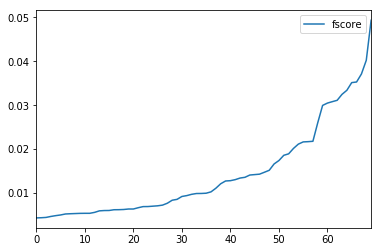

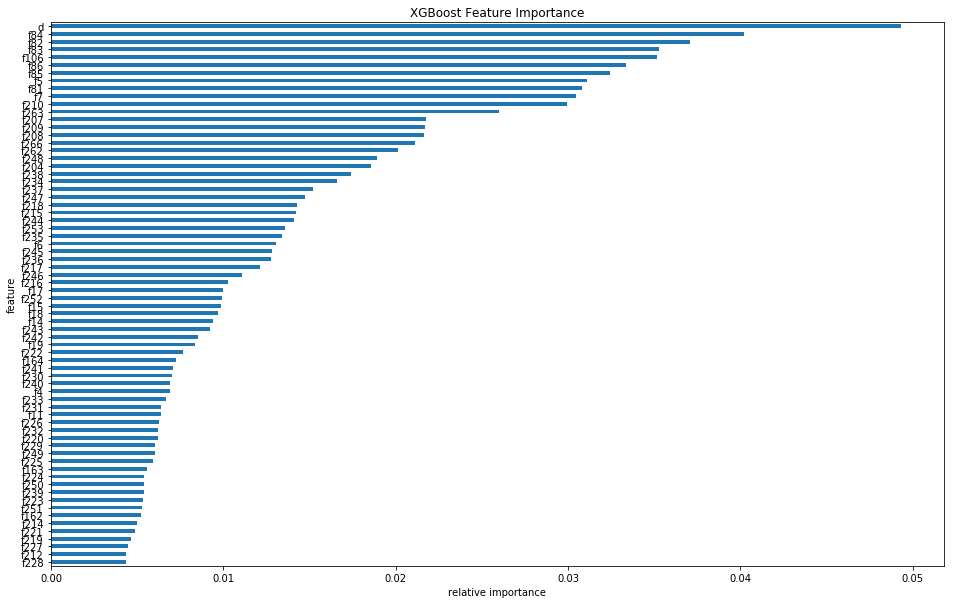

In [51]:
df = pd.DataFrame(importance, columns=['feature', 'fscore'])
df['fscore'] = df['fscore'] / df['fscore'].sum()

plt.figure()
df.plot()
df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(16, 10))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')
plt.gcf().savefig('feature_importance_xgb.png')

In [16]:
#df.head(100)

In [52]:
'''
df=df.sort_values(by='fscore',ascending=False).reset_index()
ss=df.loc[:,'feature']
s=np.array(ss).tolist()
print (s)
'''

"\ndf=df.sort_values(by='fscore',ascending=False).reset_index()\nss=df.loc[:,'feature']\ns=np.array(ss).tolist()\nprint (s)\n"

In [53]:
#s=[ 'd', 'f7', 'f248', 'f238', 'f6', 'f237', 'f234', 'f215', 'f210', 'f236', 'f244', 'f247', 'f253', 'f218', 'f243', 'f245', 'f235', 'f246', 'f15', 'f5', 'f17', 'f82', 'f217', 'f216', 'f14', 'f18', 'f19', 'f252', 'f242', 'f4', 'f209', 'f164', 'f85', 'f106', 'f222', 'f84', 'f230', 'f241', 'f226', 'f220', 'f86', 'f11', 'f233', 'f240', 'f250', 'f249', 'f225', 'f204', 'f221', 'f224', 'f231', 'f214', 'f232', 'f239', 'f207', 'f223', 'f262', 'f266', 'f162', 'f208', 'f163', 'f229', 'f83', 'f263', 'f251', 'f81', 'f212', 'f228', 'f219', 'f227', 'f213', 'f101', 'f161', 'f8', 'f165', 'f34', 'f211', 'f30', 'f9', 'f31', 'f1', 'f13', 'f52', 'f260', 'f259', 'f205', 'f12', 'f3', 'f33', 'f58', 'f53', 'f206', 'f105', 'f265', 'f261', 'f57', 'f16', 'f270', 'f48', 'f279', 'f29', 'f264', 'f10', 'f80', 'f28', 'f291', 'f50', 'f55', 'f25', 'f26', 'f49', 'f290', 'f51', 'f54', 'f2', 'f35', 'f271', 'f63', 'f27', 'f284', 'f278', 'f184', 'f185', 'f100', 'f282', 'f32', 'y', 'f297', 'f289', 'f283', 'f103', 'f174', 'f79', 'f287', 'f56', 'f23', 'f192', 'f104', 'f285', 'f183', 'f22', 'f281', 'f99', 'f175', 'f296', 'f24', 'f181', 'f21', 'm', 'f286', 'f182', 'f75', 'f193', 'f62', 'f295', 'f73', 'f191', 'f178', 'f102', 'f91', 'f293', 'f78', 'f294', 'f97', 'f110', 'f76', 'f277', 'f275', 'f180', 'f177', 'f189', 'f77', 'f280', 'f134', 'f274', 'f90', 'f93', 'f142', 'f168', 'f257', 'f113', 'f179', 'f87', 'f143', 'f187', 'f276', 'f195', 'f199', 'f66', 'f254', 'f166', 'f107', 'f95', 'f70', 'f132', 'f202', 'f109', 'f20', 'f130', 'f128', 'f203', 'f292', 'f61', 'f288', 'f176', 'f171', 'f273', 'f197', 'f172', 'f255', 'f167', 'f96', 'f72', 'f256', 'f196', 'f151', 'f98', 'f89', 'f127', 'f173', 'f71', 'f64', 'f65', 'f201', 'f170', 'f74', 'f148', 'f140', 'f200', 'f124', 'f88', 'f144', 'f67', 'f188', 'f133', 'f198', 'f186', 'f146', 'f190', 'f126', 'f145', 'f267', 'f258', 'f268', 'f269', 'f131', 'f154', 'f108', 'f40', 'f125', 'f60', 'f169', 'f94', 'f129', 'f194', 'f112', 'f147', 'f120', 'f59', 'f139', 'f158', 'f68', 'f119', 'f92', 'f155', 'f159', 'f116', 'f141', 'f114', 'f123', 'f156', 'f136', 'f272', 'f117', 'f138', 'f121', 'f160', 'f118', 'f122', 'f69', 'f137', 'f149', 'f111', 'f150', 'f152', 'f42', 'f157', 'f115', 'f135', 'f153', 'f39', 'f45', 'f47', 'f36', 'f46', 'f38', 'f41', 'f43', 'f44', 'f37']
#s=s[:100]
unknown=pd.read_csv('train_set_dflabelunknown.csv',header=0)
Y_unk=pd.DataFrame()
unknown['y']=unknown['date']//1000
unknown['m']=unknown['date']//100%100
unknown['d']=unknown['date']%100
unknown_x=(unknown.loc[:,s]).fillna(-1)
xgb_test_x = xgb.DMatrix(unknown_x,missing=-1)
predicted = model.predict(xgb_test_x,ntree_limit=model.best_iteration)
Y_unk['id']=unknown['id']
Y_unk['score']=predicted
index1=Y_unk[Y_unk['score'] >0.2].index.tolist()
print(index1)
X_unknown_train=unknown.loc[index1,s].fillna(-1)
y_unknown_train=-unknown.loc[index1,'label']
train_X,train_Y=train_X.append(X_unknown_train),train_Y.append(y_unknown_train)

[0, 1, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 17, 18, 20, 21, 23, 25, 28, 29, 31, 32, 33, 34, 35, 36, 37, 41, 43, 46, 47, 48, 49, 51, 52, 54, 55, 59, 60, 61, 62, 64, 66, 67, 69, 70, 72, 74, 75, 76, 84, 85, 87, 88, 89, 90, 91, 92, 93, 94, 106, 107, 108, 109, 110, 111, 112, 114, 115, 116, 117, 118, 119, 121, 122, 123, 124, 128, 130, 131, 133, 134, 136, 137, 139, 140, 141, 144, 146, 147, 148, 149, 150, 151, 153, 154, 157, 158, 159, 160, 162, 164, 165, 166, 168, 169, 172, 173, 174, 175, 177, 178, 179, 180, 181, 182, 184, 186, 187, 188, 189, 190, 192, 193, 195, 196, 197, 198, 199, 200, 201, 202, 204, 205, 206, 207, 208, 209, 210, 211, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 227, 228, 229, 230, 232, 233, 234, 235, 236, 237, 238, 239, 241, 243, 244, 245, 246, 248, 250, 252, 254, 255, 256, 257, 258, 260, 261, 262, 263, 265, 266, 267, 268, 269, 270, 271, 272, 274, 275, 277, 278, 279, 280, 281, 282, 285, 286, 287, 288, 289, 292, 293, 294, 296, 297, 298, 299, 300, 301, 302, 303, 

In [54]:
train_X=train_X.fillna(-1)

In [55]:
params = {'booster': 'gbtree',
              #'objective': 'multi:softmax',
              'objective': 'binary:logistic',
              'eval_metric': ['logloss','auc'],
              'gamma': 1,
              'min_child_weight': 1.5,
              'max_depth': 5,
              'lambda': 10,
              'subsample': 0.7,
              'colsample_bytree': 0.7,
              'colsample_bylevel': 0.7,
              'eta': 0.03,
              'tree_method': 'exact',
              'seed': 2017,
              'nthread': 12,
              }


plst = list(params.items())



xgb_train = xgb.DMatrix(train_X, label=train_Y,missing=-1)
xgb_val = xgb.DMatrix(eval_X,label=eval_Y,missing=-1)


# return 训练和验证的错误率
watchlist = [(xgb_train, 'train'),(xgb_val, 'val')]

print ("xgb.train")
# training model 
# early_stopping_rounds 当设置的迭代次数较大时，early_stopping_rounds 可在一定的迭代次数内准确率没有提升就停止训练
model = xgb.train(params, xgb_train,num_boost_round=10000,evals=watchlist,early_stopping_rounds=50)

xgb.train
[0]	train-logloss:0.670879	train-auc:0.929556	val-logloss:0.669977	val-auc:0.915012
Multiple eval metrics have been passed: 'val-auc' will be used for early stopping.

Will train until val-auc hasn't improved in 50 rounds.
[1]	train-logloss:0.650714	train-auc:0.940145	val-logloss:0.649116	val-auc:0.922769
[2]	train-logloss:0.630903	train-auc:0.94426	val-logloss:0.628397	val-auc:0.926501
[3]	train-logloss:0.612095	train-auc:0.944978	val-logloss:0.60892	val-auc:0.927625
[4]	train-logloss:0.594814	train-auc:0.946384	val-logloss:0.590871	val-auc:0.928335
[5]	train-logloss:0.578048	train-auc:0.951905	val-logloss:0.573612	val-auc:0.935338
[6]	train-logloss:0.561877	train-auc:0.954107	val-logloss:0.556968	val-auc:0.939359
[7]	train-logloss:0.547199	train-auc:0.95486	val-logloss:0.541474	val-auc:0.940619
[8]	train-logloss:0.532692	train-auc:0.955474	val-logloss:0.526543	val-auc:0.941367
[9]	train-logloss:0.518599	train-auc:0.955591	val-logloss:0.512028	val-auc:0.941735
[10]	train-log

[96]	train-logloss:0.174026	train-auc:0.969734	val-logloss:0.166842	val-auc:0.956532
[97]	train-logloss:0.173296	train-auc:0.969793	val-logloss:0.166239	val-auc:0.956604
[98]	train-logloss:0.172522	train-auc:0.96987	val-logloss:0.165622	val-auc:0.956619
[99]	train-logloss:0.171764	train-auc:0.969928	val-logloss:0.164945	val-auc:0.95668
[100]	train-logloss:0.171026	train-auc:0.969975	val-logloss:0.164282	val-auc:0.95672
[101]	train-logloss:0.170331	train-auc:0.969999	val-logloss:0.163661	val-auc:0.956707
[102]	train-logloss:0.169642	train-auc:0.970103	val-logloss:0.163135	val-auc:0.956725
[103]	train-logloss:0.168925	train-auc:0.970229	val-logloss:0.162499	val-auc:0.956874
[104]	train-logloss:0.168256	train-auc:0.970275	val-logloss:0.161974	val-auc:0.956873
[105]	train-logloss:0.167562	train-auc:0.970426	val-logloss:0.161365	val-auc:0.957281
[106]	train-logloss:0.166851	train-auc:0.970539	val-logloss:0.160763	val-auc:0.95752
[107]	train-logloss:0.16626	train-auc:0.970604	val-logloss:0.1

[192]	train-logloss:0.140305	train-auc:0.975648	val-logloss:0.141027	val-auc:0.962724
[193]	train-logloss:0.140183	train-auc:0.975676	val-logloss:0.140973	val-auc:0.962724
[194]	train-logloss:0.139999	train-auc:0.97571	val-logloss:0.140896	val-auc:0.962722
[195]	train-logloss:0.139761	train-auc:0.975779	val-logloss:0.140725	val-auc:0.962821
[196]	train-logloss:0.139651	train-auc:0.975819	val-logloss:0.140685	val-auc:0.962843
[197]	train-logloss:0.139513	train-auc:0.975861	val-logloss:0.140619	val-auc:0.962852
[198]	train-logloss:0.13937	train-auc:0.975906	val-logloss:0.140493	val-auc:0.962926
[199]	train-logloss:0.139267	train-auc:0.975932	val-logloss:0.140433	val-auc:0.962941
[200]	train-logloss:0.139147	train-auc:0.97596	val-logloss:0.140352	val-auc:0.962958
[201]	train-logloss:0.13901	train-auc:0.976007	val-logloss:0.140308	val-auc:0.962995
[202]	train-logloss:0.138811	train-auc:0.976056	val-logloss:0.140217	val-auc:0.963074
[203]	train-logloss:0.13864	train-auc:0.976111	val-logloss

[288]	train-logloss:0.129409	train-auc:0.978888	val-logloss:0.134317	val-auc:0.966164
[289]	train-logloss:0.12936	train-auc:0.9789	val-logloss:0.134281	val-auc:0.966182
[290]	train-logloss:0.12928	train-auc:0.978923	val-logloss:0.134256	val-auc:0.966191
[291]	train-logloss:0.129189	train-auc:0.978946	val-logloss:0.134183	val-auc:0.966222
[292]	train-logloss:0.129104	train-auc:0.978968	val-logloss:0.134146	val-auc:0.966225
[293]	train-logloss:0.129003	train-auc:0.978999	val-logloss:0.134101	val-auc:0.966243
[294]	train-logloss:0.128878	train-auc:0.979038	val-logloss:0.134076	val-auc:0.966256
[295]	train-logloss:0.128807	train-auc:0.979059	val-logloss:0.133992	val-auc:0.966316
[296]	train-logloss:0.128747	train-auc:0.979081	val-logloss:0.133943	val-auc:0.966345
[297]	train-logloss:0.128682	train-auc:0.979101	val-logloss:0.133891	val-auc:0.966376
[298]	train-logloss:0.128616	train-auc:0.979119	val-logloss:0.133859	val-auc:0.966395
[299]	train-logloss:0.128547	train-auc:0.97915	val-logloss

[384]	train-logloss:0.122325	train-auc:0.981196	val-logloss:0.130559	val-auc:0.968279
[385]	train-logloss:0.122254	train-auc:0.981221	val-logloss:0.130521	val-auc:0.968295
[386]	train-logloss:0.122158	train-auc:0.98124	val-logloss:0.130461	val-auc:0.968325
[387]	train-logloss:0.122123	train-auc:0.981253	val-logloss:0.130416	val-auc:0.968352
[388]	train-logloss:0.122089	train-auc:0.981265	val-logloss:0.130414	val-auc:0.968347
[389]	train-logloss:0.122007	train-auc:0.981292	val-logloss:0.130357	val-auc:0.968359
[390]	train-logloss:0.121958	train-auc:0.981303	val-logloss:0.130327	val-auc:0.968373
[391]	train-logloss:0.121912	train-auc:0.981316	val-logloss:0.130325	val-auc:0.968376
[392]	train-logloss:0.121862	train-auc:0.981328	val-logloss:0.13031	val-auc:0.968383
[393]	train-logloss:0.121798	train-auc:0.981348	val-logloss:0.130279	val-auc:0.9684
[394]	train-logloss:0.121732	train-auc:0.981373	val-logloss:0.130251	val-auc:0.968415
[395]	train-logloss:0.121684	train-auc:0.98139	val-logloss

[480]	train-logloss:0.116674	train-auc:0.982998	val-logloss:0.127721	val-auc:0.969841
[481]	train-logloss:0.116628	train-auc:0.98301	val-logloss:0.127704	val-auc:0.969857
[482]	train-logloss:0.116586	train-auc:0.983021	val-logloss:0.127697	val-auc:0.969858
[483]	train-logloss:0.116536	train-auc:0.983032	val-logloss:0.127675	val-auc:0.969867
[484]	train-logloss:0.116476	train-auc:0.983054	val-logloss:0.127647	val-auc:0.96989
[485]	train-logloss:0.116423	train-auc:0.983071	val-logloss:0.12761	val-auc:0.969914
[486]	train-logloss:0.116372	train-auc:0.983087	val-logloss:0.127599	val-auc:0.969921
[487]	train-logloss:0.116307	train-auc:0.983103	val-logloss:0.127582	val-auc:0.969926
[488]	train-logloss:0.116243	train-auc:0.983122	val-logloss:0.127548	val-auc:0.969937
[489]	train-logloss:0.116193	train-auc:0.983135	val-logloss:0.127533	val-auc:0.969941
[490]	train-logloss:0.116163	train-auc:0.983143	val-logloss:0.127521	val-auc:0.969944
[491]	train-logloss:0.11609	train-auc:0.983169	val-loglos

[576]	train-logloss:0.112222	train-auc:0.984326	val-logloss:0.125708	val-auc:0.970801
[577]	train-logloss:0.11217	train-auc:0.98434	val-logloss:0.125675	val-auc:0.970816
[578]	train-logloss:0.112124	train-auc:0.984355	val-logloss:0.125638	val-auc:0.970836
[579]	train-logloss:0.112082	train-auc:0.984367	val-logloss:0.125631	val-auc:0.97084
[580]	train-logloss:0.112025	train-auc:0.984387	val-logloss:0.125584	val-auc:0.970865
[581]	train-logloss:0.111973	train-auc:0.984397	val-logloss:0.125567	val-auc:0.970876
[582]	train-logloss:0.111936	train-auc:0.984408	val-logloss:0.125547	val-auc:0.970884
[583]	train-logloss:0.111877	train-auc:0.984429	val-logloss:0.125477	val-auc:0.970922
[584]	train-logloss:0.111831	train-auc:0.984445	val-logloss:0.12546	val-auc:0.970922
[585]	train-logloss:0.111798	train-auc:0.984455	val-logloss:0.125435	val-auc:0.970932
[586]	train-logloss:0.11172	train-auc:0.984476	val-logloss:0.125397	val-auc:0.970949
[587]	train-logloss:0.111632	train-auc:0.984507	val-logloss

[672]	train-logloss:0.108132	train-auc:0.985566	val-logloss:0.123776	val-auc:0.971835
[673]	train-logloss:0.108104	train-auc:0.985575	val-logloss:0.123758	val-auc:0.971847
[674]	train-logloss:0.108075	train-auc:0.985584	val-logloss:0.123748	val-auc:0.971856
[675]	train-logloss:0.108032	train-auc:0.985598	val-logloss:0.123735	val-auc:0.971859
[676]	train-logloss:0.107982	train-auc:0.985614	val-logloss:0.123728	val-auc:0.971855
[677]	train-logloss:0.107941	train-auc:0.985627	val-logloss:0.123717	val-auc:0.971853
[678]	train-logloss:0.107897	train-auc:0.985639	val-logloss:0.123729	val-auc:0.971845
[679]	train-logloss:0.107856	train-auc:0.985651	val-logloss:0.123723	val-auc:0.971852
[680]	train-logloss:0.107834	train-auc:0.985656	val-logloss:0.123717	val-auc:0.971855
[681]	train-logloss:0.107793	train-auc:0.985669	val-logloss:0.123696	val-auc:0.971862
[682]	train-logloss:0.107771	train-auc:0.985676	val-logloss:0.123681	val-auc:0.971866
[683]	train-logloss:0.107698	train-auc:0.985698	val-lo

[768]	train-logloss:0.104314	train-auc:0.986672	val-logloss:0.12244	val-auc:0.972444
[769]	train-logloss:0.104284	train-auc:0.986681	val-logloss:0.122433	val-auc:0.972444
[770]	train-logloss:0.104236	train-auc:0.986694	val-logloss:0.122436	val-auc:0.972445
[771]	train-logloss:0.104185	train-auc:0.986714	val-logloss:0.122401	val-auc:0.972466
[772]	train-logloss:0.104139	train-auc:0.986723	val-logloss:0.122376	val-auc:0.972481
[773]	train-logloss:0.10409	train-auc:0.98674	val-logloss:0.122332	val-auc:0.972503
[774]	train-logloss:0.104056	train-auc:0.986749	val-logloss:0.1223	val-auc:0.972521
[775]	train-logloss:0.104022	train-auc:0.986762	val-logloss:0.122264	val-auc:0.972533
[776]	train-logloss:0.104007	train-auc:0.986766	val-logloss:0.122247	val-auc:0.97254
[777]	train-logloss:0.10397	train-auc:0.986775	val-logloss:0.122227	val-auc:0.972547
[778]	train-logloss:0.103944	train-auc:0.986781	val-logloss:0.122225	val-auc:0.972547
[779]	train-logloss:0.10392	train-auc:0.986786	val-logloss:0.

[864]	train-logloss:0.101251	train-auc:0.98755	val-logloss:0.121285	val-auc:0.973009
[865]	train-logloss:0.101222	train-auc:0.987558	val-logloss:0.121273	val-auc:0.973018
[866]	train-logloss:0.101198	train-auc:0.987564	val-logloss:0.121261	val-auc:0.973023
[867]	train-logloss:0.101178	train-auc:0.987569	val-logloss:0.121234	val-auc:0.973036
[868]	train-logloss:0.101138	train-auc:0.987582	val-logloss:0.121229	val-auc:0.97304
[869]	train-logloss:0.101116	train-auc:0.987589	val-logloss:0.121218	val-auc:0.973048
[870]	train-logloss:0.101084	train-auc:0.987595	val-logloss:0.121202	val-auc:0.973064
[871]	train-logloss:0.101052	train-auc:0.987606	val-logloss:0.121184	val-auc:0.973073
[872]	train-logloss:0.101021	train-auc:0.987616	val-logloss:0.121173	val-auc:0.973075
[873]	train-logloss:0.100968	train-auc:0.987634	val-logloss:0.12113	val-auc:0.973093
[874]	train-logloss:0.100935	train-auc:0.987645	val-logloss:0.121118	val-auc:0.973097
[875]	train-logloss:0.100877	train-auc:0.987663	val-loglo

[960]	train-logloss:0.098284	train-auc:0.988356	val-logloss:0.12024	val-auc:0.973443
[961]	train-logloss:0.098243	train-auc:0.988368	val-logloss:0.120218	val-auc:0.973455
[962]	train-logloss:0.098226	train-auc:0.988373	val-logloss:0.120209	val-auc:0.973458
[963]	train-logloss:0.098196	train-auc:0.988382	val-logloss:0.120204	val-auc:0.973459
[964]	train-logloss:0.098164	train-auc:0.98839	val-logloss:0.120195	val-auc:0.973464
[965]	train-logloss:0.098137	train-auc:0.988397	val-logloss:0.120175	val-auc:0.973474
[966]	train-logloss:0.098111	train-auc:0.988405	val-logloss:0.120175	val-auc:0.973472
[967]	train-logloss:0.098086	train-auc:0.988412	val-logloss:0.120171	val-auc:0.973472
[968]	train-logloss:0.098062	train-auc:0.988418	val-logloss:0.120172	val-auc:0.97347
[969]	train-logloss:0.098033	train-auc:0.988427	val-logloss:0.12015	val-auc:0.973478
[970]	train-logloss:0.097998	train-auc:0.988435	val-logloss:0.120131	val-auc:0.973487
[971]	train-logloss:0.097975	train-auc:0.988441	val-loglos

[1056]	train-logloss:0.095742	train-auc:0.989065	val-logloss:0.119274	val-auc:0.973902
[1057]	train-logloss:0.095707	train-auc:0.989073	val-logloss:0.119263	val-auc:0.973906
[1058]	train-logloss:0.095665	train-auc:0.989083	val-logloss:0.119257	val-auc:0.97391
[1059]	train-logloss:0.095633	train-auc:0.989092	val-logloss:0.119256	val-auc:0.973911
[1060]	train-logloss:0.095594	train-auc:0.9891	val-logloss:0.119251	val-auc:0.973916
[1061]	train-logloss:0.095569	train-auc:0.989108	val-logloss:0.119243	val-auc:0.973919
[1062]	train-logloss:0.095552	train-auc:0.989113	val-logloss:0.119234	val-auc:0.973924
[1063]	train-logloss:0.095531	train-auc:0.989118	val-logloss:0.119238	val-auc:0.973923
[1064]	train-logloss:0.09551	train-auc:0.989124	val-logloss:0.11923	val-auc:0.973928
[1065]	train-logloss:0.09548	train-auc:0.989133	val-logloss:0.119217	val-auc:0.973939
[1066]	train-logloss:0.095444	train-auc:0.989141	val-logloss:0.119224	val-auc:0.973937
[1067]	train-logloss:0.09542	train-auc:0.989147	v

[1151]	train-logloss:0.093123	train-auc:0.989748	val-logloss:0.118439	val-auc:0.974336
[1152]	train-logloss:0.093097	train-auc:0.989754	val-logloss:0.118431	val-auc:0.974343
[1153]	train-logloss:0.093071	train-auc:0.989761	val-logloss:0.118426	val-auc:0.974343
[1154]	train-logloss:0.093053	train-auc:0.989767	val-logloss:0.118431	val-auc:0.974342
[1155]	train-logloss:0.09302	train-auc:0.989775	val-logloss:0.118422	val-auc:0.974351
[1156]	train-logloss:0.092989	train-auc:0.989783	val-logloss:0.118422	val-auc:0.974348
[1157]	train-logloss:0.092963	train-auc:0.98979	val-logloss:0.11842	val-auc:0.974356
[1158]	train-logloss:0.092955	train-auc:0.989793	val-logloss:0.118418	val-auc:0.974357
[1159]	train-logloss:0.092937	train-auc:0.989796	val-logloss:0.118415	val-auc:0.97436
[1160]	train-logloss:0.092923	train-auc:0.989798	val-logloss:0.118413	val-auc:0.974362
[1161]	train-logloss:0.092889	train-auc:0.989807	val-logloss:0.118409	val-auc:0.974366
[1162]	train-logloss:0.092859	train-auc:0.98981

[1246]	train-logloss:0.09084	train-auc:0.990327	val-logloss:0.117854	val-auc:0.974648
[1247]	train-logloss:0.090802	train-auc:0.990336	val-logloss:0.117857	val-auc:0.974647
[1248]	train-logloss:0.090768	train-auc:0.990347	val-logloss:0.117838	val-auc:0.974649
[1249]	train-logloss:0.090756	train-auc:0.99035	val-logloss:0.117851	val-auc:0.974642
[1250]	train-logloss:0.090721	train-auc:0.990358	val-logloss:0.117835	val-auc:0.974651
[1251]	train-logloss:0.090695	train-auc:0.990364	val-logloss:0.117821	val-auc:0.974661
[1252]	train-logloss:0.090668	train-auc:0.990372	val-logloss:0.117794	val-auc:0.974672
[1253]	train-logloss:0.090639	train-auc:0.990379	val-logloss:0.1178	val-auc:0.974669
[1254]	train-logloss:0.09063	train-auc:0.990381	val-logloss:0.117797	val-auc:0.97467
[1255]	train-logloss:0.090597	train-auc:0.990392	val-logloss:0.117771	val-auc:0.974685
[1256]	train-logloss:0.090575	train-auc:0.990396	val-logloss:0.117783	val-auc:0.974686
[1257]	train-logloss:0.090552	train-auc:0.990401	

[1341]	train-logloss:0.088683	train-auc:0.990862	val-logloss:0.117296	val-auc:0.974916
[1342]	train-logloss:0.088639	train-auc:0.990873	val-logloss:0.117253	val-auc:0.974937
[1343]	train-logloss:0.08863	train-auc:0.990875	val-logloss:0.117265	val-auc:0.974931
[1344]	train-logloss:0.088603	train-auc:0.990882	val-logloss:0.117263	val-auc:0.974931
[1345]	train-logloss:0.08858	train-auc:0.990886	val-logloss:0.117263	val-auc:0.974931
[1346]	train-logloss:0.088562	train-auc:0.990891	val-logloss:0.117248	val-auc:0.974939
[1347]	train-logloss:0.088543	train-auc:0.990895	val-logloss:0.117254	val-auc:0.974941
[1348]	train-logloss:0.088524	train-auc:0.990899	val-logloss:0.117263	val-auc:0.974936
[1349]	train-logloss:0.088508	train-auc:0.990902	val-logloss:0.117265	val-auc:0.974938
[1350]	train-logloss:0.088488	train-auc:0.990907	val-logloss:0.117273	val-auc:0.974933
[1351]	train-logloss:0.088473	train-auc:0.990911	val-logloss:0.117289	val-auc:0.974925
[1352]	train-logloss:0.088453	train-auc:0.990

[1436]	train-logloss:0.08659	train-auc:0.991376	val-logloss:0.116724	val-auc:0.975187
[1437]	train-logloss:0.086564	train-auc:0.991383	val-logloss:0.11671	val-auc:0.975193
[1438]	train-logloss:0.086555	train-auc:0.991385	val-logloss:0.116719	val-auc:0.975186
[1439]	train-logloss:0.086527	train-auc:0.991393	val-logloss:0.116706	val-auc:0.975194
[1440]	train-logloss:0.086505	train-auc:0.991396	val-logloss:0.116711	val-auc:0.975194
[1441]	train-logloss:0.086482	train-auc:0.991399	val-logloss:0.116699	val-auc:0.975199
[1442]	train-logloss:0.086451	train-auc:0.991407	val-logloss:0.116686	val-auc:0.975198
[1443]	train-logloss:0.086443	train-auc:0.991409	val-logloss:0.11669	val-auc:0.975195
[1444]	train-logloss:0.086424	train-auc:0.991415	val-logloss:0.116686	val-auc:0.975193
[1445]	train-logloss:0.086405	train-auc:0.991418	val-logloss:0.116678	val-auc:0.975196
[1446]	train-logloss:0.086375	train-auc:0.991426	val-logloss:0.116691	val-auc:0.975191
[1447]	train-logloss:0.086359	train-auc:0.9914

[1531]	train-logloss:0.084585	train-auc:0.991878	val-logloss:0.116274	val-auc:0.975384
[1532]	train-logloss:0.084562	train-auc:0.991884	val-logloss:0.11626	val-auc:0.975393
[1533]	train-logloss:0.084549	train-auc:0.991885	val-logloss:0.116258	val-auc:0.975396
[1534]	train-logloss:0.084527	train-auc:0.991889	val-logloss:0.116255	val-auc:0.9754
[1535]	train-logloss:0.084504	train-auc:0.991895	val-logloss:0.116231	val-auc:0.975416
[1536]	train-logloss:0.084484	train-auc:0.991899	val-logloss:0.116233	val-auc:0.975417
[1537]	train-logloss:0.084461	train-auc:0.991905	val-logloss:0.116223	val-auc:0.97542
[1538]	train-logloss:0.084431	train-auc:0.991911	val-logloss:0.116226	val-auc:0.97542
[1539]	train-logloss:0.08442	train-auc:0.991915	val-logloss:0.116219	val-auc:0.975424
[1540]	train-logloss:0.084388	train-auc:0.991924	val-logloss:0.116199	val-auc:0.975429
[1541]	train-logloss:0.084374	train-auc:0.991927	val-logloss:0.116196	val-auc:0.97543
[1542]	train-logloss:0.084349	train-auc:0.991932	v

[1626]	train-logloss:0.082739	train-auc:0.99229	val-logloss:0.115918	val-auc:0.975606
[1627]	train-logloss:0.082713	train-auc:0.992295	val-logloss:0.115918	val-auc:0.975612
[1628]	train-logloss:0.082702	train-auc:0.992297	val-logloss:0.115917	val-auc:0.975613
[1629]	train-logloss:0.082679	train-auc:0.992305	val-logloss:0.115921	val-auc:0.975609
[1630]	train-logloss:0.082656	train-auc:0.992313	val-logloss:0.115914	val-auc:0.97561
[1631]	train-logloss:0.082648	train-auc:0.992315	val-logloss:0.115912	val-auc:0.975611
[1632]	train-logloss:0.082641	train-auc:0.992316	val-logloss:0.115918	val-auc:0.975608
[1633]	train-logloss:0.082622	train-auc:0.99232	val-logloss:0.115927	val-auc:0.975606
[1634]	train-logloss:0.082607	train-auc:0.992324	val-logloss:0.115914	val-auc:0.975612
[1635]	train-logloss:0.082586	train-auc:0.992329	val-logloss:0.115921	val-auc:0.975611
[1636]	train-logloss:0.082563	train-auc:0.992333	val-logloss:0.115918	val-auc:0.975614
[1637]	train-logloss:0.08254	train-auc:0.99233

[1721]	train-logloss:0.080971	train-auc:0.992698	val-logloss:0.115568	val-auc:0.975817
[1722]	train-logloss:0.080962	train-auc:0.992699	val-logloss:0.115556	val-auc:0.975823
[1723]	train-logloss:0.080951	train-auc:0.992701	val-logloss:0.115553	val-auc:0.975825
[1724]	train-logloss:0.080928	train-auc:0.992706	val-logloss:0.115554	val-auc:0.975827
[1725]	train-logloss:0.080912	train-auc:0.992711	val-logloss:0.115559	val-auc:0.975825
[1726]	train-logloss:0.080897	train-auc:0.992714	val-logloss:0.115562	val-auc:0.975825
[1727]	train-logloss:0.080871	train-auc:0.992722	val-logloss:0.115572	val-auc:0.975817
[1728]	train-logloss:0.080857	train-auc:0.992726	val-logloss:0.115574	val-auc:0.975816
[1729]	train-logloss:0.080838	train-auc:0.992732	val-logloss:0.11557	val-auc:0.975817
[1730]	train-logloss:0.080823	train-auc:0.992734	val-logloss:0.115568	val-auc:0.975822
[1731]	train-logloss:0.080799	train-auc:0.992739	val-logloss:0.115557	val-auc:0.975829
[1732]	train-logloss:0.080773	train-auc:0.99

[1816]	train-logloss:0.079138	train-auc:0.993106	val-logloss:0.115168	val-auc:0.97604
[1817]	train-logloss:0.079118	train-auc:0.993109	val-logloss:0.115158	val-auc:0.976048
[1818]	train-logloss:0.079097	train-auc:0.993114	val-logloss:0.115148	val-auc:0.976053
[1819]	train-logloss:0.079074	train-auc:0.99312	val-logloss:0.115145	val-auc:0.976058
[1820]	train-logloss:0.079062	train-auc:0.993124	val-logloss:0.115135	val-auc:0.976062
[1821]	train-logloss:0.07905	train-auc:0.993128	val-logloss:0.115128	val-auc:0.976065
[1822]	train-logloss:0.079039	train-auc:0.99313	val-logloss:0.115131	val-auc:0.976065
[1823]	train-logloss:0.07903	train-auc:0.993132	val-logloss:0.115127	val-auc:0.976064
[1824]	train-logloss:0.079019	train-auc:0.993133	val-logloss:0.115135	val-auc:0.976063
[1825]	train-logloss:0.078998	train-auc:0.993137	val-logloss:0.115131	val-auc:0.976063
[1826]	train-logloss:0.078988	train-auc:0.99314	val-logloss:0.115118	val-auc:0.97607
[1827]	train-logloss:0.078964	train-auc:0.993147	v

[1911]	train-logloss:0.077595	train-auc:0.99345	val-logloss:0.114884	val-auc:0.976216
[1912]	train-logloss:0.077579	train-auc:0.993454	val-logloss:0.114877	val-auc:0.976216
[1913]	train-logloss:0.077556	train-auc:0.993457	val-logloss:0.114874	val-auc:0.976216
[1914]	train-logloss:0.07754	train-auc:0.993461	val-logloss:0.114864	val-auc:0.97622
[1915]	train-logloss:0.077527	train-auc:0.993464	val-logloss:0.114864	val-auc:0.976219
[1916]	train-logloss:0.077503	train-auc:0.993469	val-logloss:0.114848	val-auc:0.976225
[1917]	train-logloss:0.077483	train-auc:0.993473	val-logloss:0.114833	val-auc:0.976228
[1918]	train-logloss:0.077463	train-auc:0.993478	val-logloss:0.114842	val-auc:0.976228
[1919]	train-logloss:0.077444	train-auc:0.993482	val-logloss:0.114842	val-auc:0.976229
[1920]	train-logloss:0.077426	train-auc:0.993485	val-logloss:0.114847	val-auc:0.976227
[1921]	train-logloss:0.077409	train-auc:0.99349	val-logloss:0.114817	val-auc:0.976239
[1922]	train-logloss:0.077391	train-auc:0.99349

[2006]	train-logloss:0.0759	train-auc:0.993819	val-logloss:0.114595	val-auc:0.976365
[2007]	train-logloss:0.07588	train-auc:0.993825	val-logloss:0.114599	val-auc:0.976362
[2008]	train-logloss:0.075866	train-auc:0.993828	val-logloss:0.114573	val-auc:0.976378
[2009]	train-logloss:0.07584	train-auc:0.993831	val-logloss:0.114583	val-auc:0.976375
[2010]	train-logloss:0.075819	train-auc:0.993836	val-logloss:0.114576	val-auc:0.976378
[2011]	train-logloss:0.0758	train-auc:0.99384	val-logloss:0.114575	val-auc:0.97638
[2012]	train-logloss:0.075783	train-auc:0.993844	val-logloss:0.114579	val-auc:0.976379
[2013]	train-logloss:0.075761	train-auc:0.993848	val-logloss:0.114584	val-auc:0.976379
[2014]	train-logloss:0.075749	train-auc:0.993852	val-logloss:0.114571	val-auc:0.976381
[2015]	train-logloss:0.075726	train-auc:0.993856	val-logloss:0.114585	val-auc:0.976378
[2016]	train-logloss:0.075699	train-auc:0.993862	val-logloss:0.114586	val-auc:0.97638
[2017]	train-logloss:0.075683	train-auc:0.993865	val

[2101]	train-logloss:0.074429	train-auc:0.994131	val-logloss:0.114323	val-auc:0.976495
[2102]	train-logloss:0.074416	train-auc:0.994134	val-logloss:0.114303	val-auc:0.976505
[2103]	train-logloss:0.074398	train-auc:0.994139	val-logloss:0.114301	val-auc:0.976508
[2104]	train-logloss:0.074381	train-auc:0.994142	val-logloss:0.114305	val-auc:0.976509
[2105]	train-logloss:0.074374	train-auc:0.994143	val-logloss:0.11431	val-auc:0.976505
[2106]	train-logloss:0.074355	train-auc:0.994145	val-logloss:0.114304	val-auc:0.976509
[2107]	train-logloss:0.074337	train-auc:0.99415	val-logloss:0.1143	val-auc:0.97651
[2108]	train-logloss:0.074309	train-auc:0.994157	val-logloss:0.114285	val-auc:0.976517
[2109]	train-logloss:0.074291	train-auc:0.994162	val-logloss:0.114301	val-auc:0.976511
[2110]	train-logloss:0.074272	train-auc:0.994166	val-logloss:0.114309	val-auc:0.97651
[2111]	train-logloss:0.074263	train-auc:0.994168	val-logloss:0.11431	val-auc:0.97651
[2112]	train-logloss:0.074252	train-auc:0.994171	va

[2196]	train-logloss:0.073035	train-auc:0.99442	val-logloss:0.114136	val-auc:0.976629
[2197]	train-logloss:0.073023	train-auc:0.994422	val-logloss:0.114132	val-auc:0.976635
[2198]	train-logloss:0.073005	train-auc:0.994425	val-logloss:0.11414	val-auc:0.976633
[2199]	train-logloss:0.072994	train-auc:0.994427	val-logloss:0.114138	val-auc:0.976635
[2200]	train-logloss:0.07298	train-auc:0.99443	val-logloss:0.114118	val-auc:0.976648
[2201]	train-logloss:0.072958	train-auc:0.994434	val-logloss:0.114117	val-auc:0.976651
[2202]	train-logloss:0.072943	train-auc:0.994438	val-logloss:0.114106	val-auc:0.976656
[2203]	train-logloss:0.072929	train-auc:0.99444	val-logloss:0.114107	val-auc:0.976658
[2204]	train-logloss:0.07292	train-auc:0.994442	val-logloss:0.114094	val-auc:0.976665
[2205]	train-logloss:0.072896	train-auc:0.994445	val-logloss:0.11411	val-auc:0.976657
[2206]	train-logloss:0.072888	train-auc:0.994447	val-logloss:0.114099	val-auc:0.976664
[2207]	train-logloss:0.072867	train-auc:0.994452	v

[2291]	train-logloss:0.071578	train-auc:0.994708	val-logloss:0.113939	val-auc:0.976775
[2292]	train-logloss:0.071556	train-auc:0.994714	val-logloss:0.113946	val-auc:0.976775
[2293]	train-logloss:0.071536	train-auc:0.994718	val-logloss:0.113954	val-auc:0.976773
[2294]	train-logloss:0.071527	train-auc:0.99472	val-logloss:0.113953	val-auc:0.976775
[2295]	train-logloss:0.071524	train-auc:0.994721	val-logloss:0.113954	val-auc:0.976773
[2296]	train-logloss:0.07151	train-auc:0.994724	val-logloss:0.113958	val-auc:0.976772
[2297]	train-logloss:0.071506	train-auc:0.994725	val-logloss:0.113953	val-auc:0.976772
[2298]	train-logloss:0.071488	train-auc:0.994728	val-logloss:0.113959	val-auc:0.976774
[2299]	train-logloss:0.071471	train-auc:0.994732	val-logloss:0.113961	val-auc:0.976773
[2300]	train-logloss:0.071455	train-auc:0.994734	val-logloss:0.113963	val-auc:0.976776
[2301]	train-logloss:0.071438	train-auc:0.994735	val-logloss:0.113971	val-auc:0.976774
[2302]	train-logloss:0.071427	train-auc:0.994

[2386]	train-logloss:0.07016	train-auc:0.994991	val-logloss:0.113704	val-auc:0.976923
[2387]	train-logloss:0.070143	train-auc:0.994992	val-logloss:0.113698	val-auc:0.976926
[2388]	train-logloss:0.070133	train-auc:0.994993	val-logloss:0.113698	val-auc:0.976926
[2389]	train-logloss:0.070113	train-auc:0.994995	val-logloss:0.113699	val-auc:0.976928
[2390]	train-logloss:0.070099	train-auc:0.994998	val-logloss:0.11369	val-auc:0.976934
[2391]	train-logloss:0.070088	train-auc:0.995	val-logloss:0.1137	val-auc:0.97693
[2392]	train-logloss:0.070075	train-auc:0.995002	val-logloss:0.113712	val-auc:0.976927
[2393]	train-logloss:0.070056	train-auc:0.995006	val-logloss:0.113723	val-auc:0.97692
[2394]	train-logloss:0.070032	train-auc:0.995011	val-logloss:0.113724	val-auc:0.976922
[2395]	train-logloss:0.070019	train-auc:0.995014	val-logloss:0.113731	val-auc:0.976918
[2396]	train-logloss:0.070004	train-auc:0.995016	val-logloss:0.113743	val-auc:0.976914
[2397]	train-logloss:0.069992	train-auc:0.995018	val

[2481]	train-logloss:0.068815	train-auc:0.995238	val-logloss:0.113592	val-auc:0.977008
[2482]	train-logloss:0.068808	train-auc:0.99524	val-logloss:0.11359	val-auc:0.977011
[2483]	train-logloss:0.068786	train-auc:0.995246	val-logloss:0.11358	val-auc:0.977013
[2484]	train-logloss:0.068774	train-auc:0.995247	val-logloss:0.113582	val-auc:0.977015
[2485]	train-logloss:0.068754	train-auc:0.995252	val-logloss:0.113578	val-auc:0.977018
[2486]	train-logloss:0.068741	train-auc:0.995257	val-logloss:0.113574	val-auc:0.977019
[2487]	train-logloss:0.068721	train-auc:0.99526	val-logloss:0.113583	val-auc:0.977012
[2488]	train-logloss:0.068712	train-auc:0.995262	val-logloss:0.113576	val-auc:0.977016
[2489]	train-logloss:0.0687	train-auc:0.995262	val-logloss:0.113603	val-auc:0.97701
[2490]	train-logloss:0.068687	train-auc:0.995264	val-logloss:0.113604	val-auc:0.97701
[2491]	train-logloss:0.068649	train-auc:0.995273	val-logloss:0.11356	val-auc:0.977026
[2492]	train-logloss:0.068639	train-auc:0.995275	val

[2576]	train-logloss:0.067449	train-auc:0.995502	val-logloss:0.113405	val-auc:0.977111
[2577]	train-logloss:0.067428	train-auc:0.995504	val-logloss:0.113417	val-auc:0.977109
[2578]	train-logloss:0.067401	train-auc:0.99551	val-logloss:0.113408	val-auc:0.977114
[2579]	train-logloss:0.067389	train-auc:0.995513	val-logloss:0.113405	val-auc:0.977115
[2580]	train-logloss:0.067371	train-auc:0.995516	val-logloss:0.113402	val-auc:0.97712
[2581]	train-logloss:0.06736	train-auc:0.995519	val-logloss:0.113398	val-auc:0.977122
[2582]	train-logloss:0.067343	train-auc:0.995523	val-logloss:0.113387	val-auc:0.977127
[2583]	train-logloss:0.067327	train-auc:0.995526	val-logloss:0.113381	val-auc:0.977129
[2584]	train-logloss:0.067313	train-auc:0.99553	val-logloss:0.113369	val-auc:0.977136
[2585]	train-logloss:0.067303	train-auc:0.995531	val-logloss:0.113365	val-auc:0.977139
[2586]	train-logloss:0.067287	train-auc:0.995534	val-logloss:0.113365	val-auc:0.977141
[2587]	train-logloss:0.067277	train-auc:0.99553

[2671]	train-logloss:0.066217	train-auc:0.99572	val-logloss:0.113383	val-auc:0.977197
[2672]	train-logloss:0.066203	train-auc:0.995723	val-logloss:0.113378	val-auc:0.977202
[2673]	train-logloss:0.066189	train-auc:0.995725	val-logloss:0.113375	val-auc:0.977203
[2674]	train-logloss:0.066176	train-auc:0.995729	val-logloss:0.11336	val-auc:0.977207
[2675]	train-logloss:0.066167	train-auc:0.995732	val-logloss:0.113349	val-auc:0.977208
[2676]	train-logloss:0.066138	train-auc:0.995736	val-logloss:0.113326	val-auc:0.977219
[2677]	train-logloss:0.066117	train-auc:0.995741	val-logloss:0.113323	val-auc:0.977224
[2678]	train-logloss:0.066106	train-auc:0.995743	val-logloss:0.11332	val-auc:0.977225
[2679]	train-logloss:0.066089	train-auc:0.995744	val-logloss:0.113317	val-auc:0.977227
[2680]	train-logloss:0.066073	train-auc:0.995748	val-logloss:0.113321	val-auc:0.977225
[2681]	train-logloss:0.066068	train-auc:0.995749	val-logloss:0.113328	val-auc:0.977225
[2682]	train-logloss:0.066054	train-auc:0.9957

[2766]	train-logloss:0.06499	train-auc:0.995935	val-logloss:0.113174	val-auc:0.977344
[2767]	train-logloss:0.064977	train-auc:0.995939	val-logloss:0.113171	val-auc:0.977343
[2768]	train-logloss:0.064969	train-auc:0.995938	val-logloss:0.113191	val-auc:0.977337
[2769]	train-logloss:0.064949	train-auc:0.995941	val-logloss:0.113182	val-auc:0.977339
[2770]	train-logloss:0.064941	train-auc:0.995942	val-logloss:0.11318	val-auc:0.977339
[2771]	train-logloss:0.064924	train-auc:0.995946	val-logloss:0.113163	val-auc:0.977349
[2772]	train-logloss:0.064914	train-auc:0.995948	val-logloss:0.113161	val-auc:0.97735
[2773]	train-logloss:0.0649	train-auc:0.99595	val-logloss:0.113162	val-auc:0.977353
[2774]	train-logloss:0.06487	train-auc:0.995955	val-logloss:0.11315	val-auc:0.977357
[2775]	train-logloss:0.06485	train-auc:0.995959	val-logloss:0.113146	val-auc:0.977356
[2776]	train-logloss:0.064838	train-auc:0.995961	val-logloss:0.11314	val-auc:0.977358
[2777]	train-logloss:0.064829	train-auc:0.995962	val-

[2861]	train-logloss:0.063777	train-auc:0.996153	val-logloss:0.113077	val-auc:0.977416
[2862]	train-logloss:0.063764	train-auc:0.996155	val-logloss:0.113073	val-auc:0.977422
[2863]	train-logloss:0.063751	train-auc:0.996157	val-logloss:0.113062	val-auc:0.977428
[2864]	train-logloss:0.063737	train-auc:0.99616	val-logloss:0.113058	val-auc:0.977429
[2865]	train-logloss:0.063719	train-auc:0.996163	val-logloss:0.113073	val-auc:0.977425
[2866]	train-logloss:0.063713	train-auc:0.996163	val-logloss:0.113072	val-auc:0.977424
[2867]	train-logloss:0.063704	train-auc:0.996164	val-logloss:0.113077	val-auc:0.977421
[2868]	train-logloss:0.063695	train-auc:0.996165	val-logloss:0.113064	val-auc:0.97743
[2869]	train-logloss:0.063683	train-auc:0.996167	val-logloss:0.113047	val-auc:0.977433
[2870]	train-logloss:0.063675	train-auc:0.99617	val-logloss:0.113033	val-auc:0.977438
[2871]	train-logloss:0.063668	train-auc:0.996171	val-logloss:0.113039	val-auc:0.977439
[2872]	train-logloss:0.063657	train-auc:0.9961

[2956]	train-logloss:0.062635	train-auc:0.996339	val-logloss:0.112883	val-auc:0.977548
[2957]	train-logloss:0.062622	train-auc:0.996339	val-logloss:0.112894	val-auc:0.977548
[2958]	train-logloss:0.062607	train-auc:0.996343	val-logloss:0.112897	val-auc:0.977548
[2959]	train-logloss:0.062592	train-auc:0.996345	val-logloss:0.112897	val-auc:0.977546
[2960]	train-logloss:0.062582	train-auc:0.996346	val-logloss:0.112894	val-auc:0.977551
[2961]	train-logloss:0.062574	train-auc:0.996347	val-logloss:0.112896	val-auc:0.977547
[2962]	train-logloss:0.062566	train-auc:0.996349	val-logloss:0.11288	val-auc:0.977555
[2963]	train-logloss:0.062556	train-auc:0.996351	val-logloss:0.112885	val-auc:0.977553
[2964]	train-logloss:0.062551	train-auc:0.996352	val-logloss:0.11289	val-auc:0.97755
[2965]	train-logloss:0.062539	train-auc:0.996355	val-logloss:0.112894	val-auc:0.977548
[2966]	train-logloss:0.062529	train-auc:0.996357	val-logloss:0.112894	val-auc:0.977545
[2967]	train-logloss:0.062512	train-auc:0.9963

[3051]	train-logloss:0.061568	train-auc:0.996522	val-logloss:0.112822	val-auc:0.977593
[3052]	train-logloss:0.061545	train-auc:0.996528	val-logloss:0.112824	val-auc:0.977589
[3053]	train-logloss:0.061539	train-auc:0.996528	val-logloss:0.112817	val-auc:0.977593
[3054]	train-logloss:0.06153	train-auc:0.996529	val-logloss:0.112822	val-auc:0.977591
[3055]	train-logloss:0.061522	train-auc:0.99653	val-logloss:0.112823	val-auc:0.977594
[3056]	train-logloss:0.061508	train-auc:0.996532	val-logloss:0.112835	val-auc:0.977591
[3057]	train-logloss:0.061504	train-auc:0.996533	val-logloss:0.112828	val-auc:0.977594
[3058]	train-logloss:0.061488	train-auc:0.996536	val-logloss:0.112822	val-auc:0.977602
[3059]	train-logloss:0.061472	train-auc:0.996539	val-logloss:0.112823	val-auc:0.9776
[3060]	train-logloss:0.06146	train-auc:0.99654	val-logloss:0.112829	val-auc:0.977599
[3061]	train-logloss:0.061443	train-auc:0.996544	val-logloss:0.112836	val-auc:0.977598
[3062]	train-logloss:0.061423	train-auc:0.996548	

[3146]	train-logloss:0.060441	train-auc:0.996706	val-logloss:0.112739	val-auc:0.977663
[3147]	train-logloss:0.060432	train-auc:0.996707	val-logloss:0.112735	val-auc:0.977666
[3148]	train-logloss:0.060428	train-auc:0.996708	val-logloss:0.112736	val-auc:0.977666
[3149]	train-logloss:0.060418	train-auc:0.996709	val-logloss:0.112749	val-auc:0.977661
[3150]	train-logloss:0.060405	train-auc:0.996711	val-logloss:0.112742	val-auc:0.977663
[3151]	train-logloss:0.060398	train-auc:0.996713	val-logloss:0.112747	val-auc:0.977663
[3152]	train-logloss:0.060382	train-auc:0.996716	val-logloss:0.112745	val-auc:0.977665
[3153]	train-logloss:0.060364	train-auc:0.996718	val-logloss:0.112743	val-auc:0.977668
[3154]	train-logloss:0.060343	train-auc:0.99672	val-logloss:0.112721	val-auc:0.977676
[3155]	train-logloss:0.060333	train-auc:0.996722	val-logloss:0.112714	val-auc:0.977679
[3156]	train-logloss:0.060318	train-auc:0.996725	val-logloss:0.112692	val-auc:0.977686
[3157]	train-logloss:0.060305	train-auc:0.99

[3241]	train-logloss:0.059367	train-auc:0.996873	val-logloss:0.11266	val-auc:0.977736
[3242]	train-logloss:0.05935	train-auc:0.996876	val-logloss:0.112667	val-auc:0.977735
[3243]	train-logloss:0.059345	train-auc:0.996876	val-logloss:0.112672	val-auc:0.977736
[3244]	train-logloss:0.059335	train-auc:0.996878	val-logloss:0.112678	val-auc:0.977733
[3245]	train-logloss:0.059321	train-auc:0.996879	val-logloss:0.112679	val-auc:0.977736
[3246]	train-logloss:0.05931	train-auc:0.996881	val-logloss:0.112684	val-auc:0.977732
[3247]	train-logloss:0.059295	train-auc:0.996884	val-logloss:0.11269	val-auc:0.977728
[3248]	train-logloss:0.059281	train-auc:0.996886	val-logloss:0.112693	val-auc:0.977727
[3249]	train-logloss:0.059267	train-auc:0.996889	val-logloss:0.112692	val-auc:0.977729
[3250]	train-logloss:0.059259	train-auc:0.99689	val-logloss:0.112689	val-auc:0.977732
[3251]	train-logloss:0.059245	train-auc:0.996893	val-logloss:0.11269	val-auc:0.977731
[3252]	train-logloss:0.059242	train-auc:0.996893	

In [56]:
model.save_model('xgb_model_addunknown.txt')

In [57]:
test_=[]
for i in range(6):
    Y_=pd.DataFrame()
    test=pd.read_csv('test_set_b_%d.csv'%i)
    test['y']=test['date']//1000
    test['m']=test['date']//100%100
    test['d']=test['date']%100
    test_x=(test.loc[:,s]).fillna(-1)
    xgb_test_x = xgb.DMatrix(test_x,missing=-1)
    predicted = model.predict(xgb_test_x,ntree_limit=model.best_iteration)
    
    Y_['id']=test['id']
    Y_['score']=predicted
    Y_.to_csv('F:/anti/test_set_score_b_%d.csv'%i,index=False)
    test_.append(Y_)

print ('========================')
test_=pd.concat(test_)
test_.to_csv('test_set_score_b_xgb_addunknown.csv',index=False)

In [ ]:
'''
#以下程序未执行







'''

In [ ]:
#trainData2= pd.read_csv('train_set_dflabelunknown.csv',header=0)
unknown=pd.read_csv('train_set_dflabelunknown.csv',header=0)
X_unk=np.array(unknown.loc[:,s])
Y_unk=pd.DataFrame()
y_pred_balanced_bagging = gbm.predict(X_unk)
Y_unk['id']=unknown['id']
Y_unk['score']=y_pred_balanced_bagging
index1=Y_unk[Y_unk['score'] >0.3].index.tolist()
#print(index1)
#X_unknown_train=unknown.loc[index1,s]
#y_unknown_train=-unknown.loc[index1,'label']
#X_unknown_train, y_unknown_train=unknown.loc[index1,s],-unknown.loc[index1,'label']
#X_unknown_train=X_unknown_train.fillna(0)
train_x,train_y=train_x.append(X_unknown_train),train_y.append(y_unknown_train)

In [30]:
test_=[]
for i in range(6):
    Y_=pd.DataFrame()
    test=pd.read_csv('test_set_b_%d.csv'%i)
    
    test_x=np.array(test.loc[:,s])
    predicted = gbm.predict(test_x,num_iteration=gbm.best_iteration)
    Y_['id']=test['id']
    Y_['score']=predicted
    Y_.to_csv('F:/anti/test_set_score_b_%d.csv'%i,index=False)
    test_.append(Y_)

print ('========================')
test_=pd.concat(test_)
test_.to_csv('test_set_score_b.csv',index=False)

In [ ]:
feature=[['f235', 0.24277271063415065, 0.5], ['f236', 0.23256584227052, 0.5], ['f234', 0.21852324880065013, 0.5], ['f238', 0.20669227663973286, 0.5], ['f237', 0.20567030143383547, 0.5], ['f215', 0.18003586190466467, 0.5], ['f7', 0.162332723652273, 0.5], ['f216', 0.1446281769584835, 0.5], ['f244', 0.13892783851103804, 0.5], ['f6', 0.13032218523874226, 0.5], ['f245', 0.1224749414492881, 0.5], ['f217', 0.11778605208130105, 0.5], ['f12', 0.11220688045867938, 0.5], ['f246', 0.0944845317959146, 0.5], ['f218', 0.0841674665273542, 0.5], ['f14', 0.07648252484818509, 0.5], ['f247', 0.05870535011692454, 0.5], ['f9', 0.054703167983445544, 0.5], ['f16', 0.054399978188648404, 0.5], ['f248', 0.054396213182353534, 0.5], ['f18', 0.053377355965473015, 0.5], ['f17', 0.05277656470300024, 0.5], ['f1', 0.048323215878311024, 0.5], ['f15', 0.04512025819443611, 0.5], ['f3', 0.033334950128024, 0.5], ['f243', 0.03116194081685024, 0.5], ['f242', 0.02845729625450647, 0.5], ['f253', 0.023578334266884604, 0.5], ['f11', 0.02343224272025608, 0.5], ['f250', 0.020784032759080837, 0.5], ['f4', 0.01995060944911291, 0.5], ['f241', 0.019680611801856637, 0.5], ['f240', 0.019468833516774347, 0.5], ['f252', 0.018630984649919094, 0.5], ['date', 0.018462271194602548, 0.5], ['f214', 0.017381164702992575, 0.5], ['f162', 0.01718247917779111, 0.5], ['f212', 0.01702770092843368, 0.5], ['f164', 0.01696777187422456, 0.5], ['f227', 0.016201156360754226, 0.5], ['f229', 0.016012814148916404, 0.5], ['f165', 0.015663417987175063, 0.5], ['f13', 0.015409398433251623, 0.5], ['f161', 0.015129186060917385, 0.5], ['f211', 0.01446420022336798, 0.5], ['f228', 0.013706938616999493, 0.5], ['f163', 0.013585267001421921, 0.5], ['f224', 0.01330379020966929, 0.5], ['f226', 0.012988463102088342, 0.5], ['f231', 0.012540905076059148, 0.5], ['f213', 0.012351265640991082, 0.5], ['f249', 0.01197224276917945, 0.5], ['f251', 0.011765270724995986, 0.5], ['f222', 0.011369904891302428, 0.5], ['f225', 0.011092105556587375, 0.5], ['f223', 0.011058827795219106, 0.5], ['f19', 0.010735071769281145, 0.5], ['f230', 0.009945204861347538, 0.5], ['f233', 0.009826605087938454, 0.5], ['f220', 0.009017478325812626, 0.5], ['f232', 0.008497838661735372, 0.5], ['f221', 0.00812703778627346, 0.5], ['f239', 0.007158846304609741, 0.5], ['f219', 0.004992909680328867, 0.5], ['f8', 0.0030139124544507705, 0.5], ['f2', 0.0009461512568509897, 0.5], ['f10', 0.00011296341219061222, 0.5]]
feature=[['f261', 0.33029671565601293, 0.5], ['f260', 0.3256918087259907, 0.5], ['f259', 0.31760248730956275, 0.5], ['f262', 0.3084464625689011, 0.5], ['f264', 0.3041963844158335, 0.5], ['f271', 0.30097797868208404, 0.5], ['f265', 0.28776080074474697, 0.5], ['f270', 0.28751873987998744, 0.5], ['f263', 0.2760101410146563, 0.5], ['f266', 0.2656864100408039, 0.5], ['f235', 0.24277271063415065, 0.5], ['f204', 0.23975444749788635, 0.5], ['f236', 0.23256584227052, 0.5], ['f234', 0.21852324880065013, 0.5], ['f238', 0.20669227663973286, 0.5], ['f237', 0.20567030143383547, 0.5], ['f205', 0.2012304069895149, 0.5], ['f215', 0.18003586190466467, 0.5], ['f282', 0.1778345647631083, 0.5], ['f279', 0.17615169382462614, 0.5], ['f280', 0.1735188043708116, 0.5], ['f185', 0.17310082158890924, 0.5], ['f281', 0.1719725901849352, 0.5], ['f206', 0.16597615054025133, 0.5], ['f7', 0.162332723652273, 0.5], ['f5', 0.16066140709165044, 0.5], ['f31', 0.1583523257924094, 0.5], ['f30', 0.15785399326137475, 0.5], ['f184', 0.1510030619818684, 0.5], ['f210', 0.14830258889621756, 0.5], ['f216', 0.1446281769584835, 0.5], ['f244', 0.13892783851103804, 0.5], ['f292', 0.1311460861874161, 0.5], ['f6', 0.13032218523874226, 0.5], ['f278', 0.12865228772065992, 0.5], ['f291', 0.1264473027413392, 0.5], ['f183', 0.12598696397063203, 0.5], ['f29', 0.12408179484338454, 0.5], ['f245', 0.1224749414492881, 0.5], ['f28', 0.1220907170265826, 0.5], ['f25', 0.12185396668510393, 0.5], ['f288', 0.12152580105643564, 0.5], ['f209', 0.12110033379564805, 0.5], ['f52', 0.12064809718366401, 0.5], ['f24', 0.1197759400056249, 0.5], ['f54', 0.11974081344493727, 0.5], ['f27', 0.1192798407551253, 0.5], ['f217', 0.11778605208130105, 0.5], ['f53', 0.11668843442082216, 0.5], ['f207', 0.11303679541187028, 0.5], ['f26', 0.11262715447309721, 0.5], ['f12', 0.11220688045867938, 0.5], ['f192', 0.11166904718940875, 0.5], ['f193', 0.1092406872091875, 0.5], ['f55', 0.1087055633076366, 0.5], ['f191', 0.1067978076366178, 0.5], ['f203', 0.10609258422043565, 0.5], ['f269', 0.10525709907600397, 0.5], ['f198', 0.1045569149258525, 0.5], ['f202', 0.10444031998379756, 0.5], ['f258', 0.10338940508731749, 0.5], ['f289', 0.10289505644236875, 0.5], ['f197', 0.10243162344103808, 0.5], ['f295', 0.10220539864832512, 0.5], ['f290', 0.10161837418168125, 0.5], ['f23', 0.10089432492088636, 0.5], ['f208', 0.10058490598417756, 0.5], ['f287', 0.09884119716066825, 0.5], ['f171', 0.09874667628270627, 0.5], ['f182', 0.098419310585782, 0.5], ['f178', 0.09796041655203494, 0.5], ['f268', 0.09752601717418825, 0.5], ['f257', 0.09736030804508439, 0.5], ['f190', 0.09693387713836697, 0.5], ['f22', 0.09605622955475104, 0.5], ['f294', 0.09542769202583895, 0.5], ['f170', 0.09457535190394986, 0.5], ['f246', 0.0944845317959146, 0.5], ['f196', 0.09208113618253783, 0.5], ['f201', 0.09158404905534386, 0.5], ['f189', 0.09113585104655177, 0.5], ['f177', 0.09097951095107876, 0.5], ['f286', 0.08969558539371293, 0.5], ['f179', 0.0890766360380993, 0.5], ['f169', 0.08816998455282773, 0.5], ['f256', 0.08672909892748155, 0.5], ['f267', 0.08651489624380396, 0.5], ['f188', 0.08626570375368126, 0.5], ['f176', 0.08622975453524068, 0.5], ['f200', 0.08601213036661731, 0.5], ['f195', 0.08596828454145744, 0.5], ['f273', 0.08594555855375033, 0.5], ['f255', 0.08560827586391107, 0.5], ['f187', 0.08537577215914198, 0.5], ['f284', 0.0849704005402278, 0.5], ['f172', 0.08480597782826486, 0.5], ['f168', 0.08467757206371432, 0.5], ['f167', 0.08462565393082908, 0.5], ['f194', 0.08456918314911296, 0.5], ['f272', 0.08419423166659275, 0.5], ['f218', 0.0841674665273542, 0.5], ['f181', 0.08414832314255091, 0.5], ['f254', 0.0841362830008292, 0.5], ['f293', 0.08411310228420861, 0.5], ['f186', 0.0840798291494328, 0.5], ['f173', 0.08397061597596911, 0.5], ['f199', 0.0838438164647821, 0.5], ['f175', 0.08356909486338975, 0.5], ['f166', 0.08356360691507778, 0.5], ['f180', 0.08330551611471253, 0.5], ['f285', 0.08328763621608108, 0.5], ['f174', 0.08316884989081609, 0.5], ['f297', 0.08188051564608832, 0.5], ['f14', 0.07648252484818509, 0.5], ['f51', 0.07343907774716384, 0.5], ['f296', 0.07308733141757115, 0.5], ['f283', 0.07129804694972448, 0.5], ['f35', 0.06974768656022992, 0.5], ['f56', 0.06929521322397394, 0.5], ['f50', 0.06890433397867984, 0.5], ['f33', 0.06859021740630104, 0.5], ['f49', 0.06767099677762106, 0.5], ['f21', 0.06704136907002702, 0.5], ['f20', 0.06668239556629006, 0.5], ['f32', 0.0661886579465053, 0.5], ['f48', 0.06552948858769203, 0.5], ['f34', 0.06468940708924721, 0.5], ['f57', 0.060511793143733714, 0.5], ['f247', 0.05870535011692454, 0.5], ['f9', 0.054703167983445544, 0.5], ['f16', 0.054399978188648404, 0.5], ['f248', 0.054396213182353534, 0.5], ['f58', 0.054333426469621096, 0.5], ['f18', 0.053377355965473015, 0.5], ['f17', 0.05277656470300024, 0.5], ['f1', 0.048323215878311024, 0.5], ['f277', 0.04676142945807303, 0.5], ['f15', 0.04512025819443611, 0.5], ['f276', 0.04473680791620474, 0.5], ['f274', 0.04391347975224537, 0.5], ['f63', 0.03887945500678798, 0.5], ['f275', 0.038356129695047994, 0.5], ['f3', 0.033334950128024, 0.5], ['f62', 0.03253127337319326, 0.5], ['f243', 0.03116194081685024, 0.5], ['f242', 0.02845729625450647, 0.5], ['f61', 0.0241320625546105, 0.5], ['f253', 0.023578334266884604, 0.5], ['f11', 0.02343224272025608, 0.5], ['f250', 0.020784032759080837, 0.5], ['f4', 0.01995060944911291, 0.5], ['f241', 0.019680611801856637, 0.5], ['f240', 0.019468833516774347, 0.5], ['f252', 0.018630984649919094, 0.5], ['date', 0.018462271194602548, 0.5], ['f214', 0.017381164702992575, 0.5], ['f162', 0.01718247917779111, 0.5], ['f212', 0.01702770092843368, 0.5], ['f164', 0.01696777187422456, 0.5], ['f59', 0.016726084128679188, 0.5], ['f60', 0.01641419668203693, 0.5], ['f227', 0.016201156360754226, 0.5], ['f229', 0.016012814148916404, 0.5], ['f165', 0.015663417987175063, 0.5], ['f13', 0.015409398433251623, 0.5], ['f161', 0.015129186060917385, 0.5], ['f211', 0.01446420022336798, 0.5], ['f228', 0.013706938616999493, 0.5], ['f163', 0.013585267001421921, 0.5], ['f224', 0.01330379020966929, 0.5], ['f226', 0.012988463102088342, 0.5], ['f231', 0.012540905076059148, 0.5], ['f213', 0.012351265640991082, 0.5], ['f249', 0.01197224276917945, 0.5], ['f251', 0.011765270724995986, 0.5], ['f222', 0.011369904891302428, 0.5], ['f225', 0.011092105556587375, 0.5], ['f223', 0.011058827795219106, 0.5], ['f19', 0.010735071769281145, 0.5], ['f230', 0.009945204861347538, 0.5], ['f233', 0.009826605087938454, 0.5], ['f220', 0.009017478325812626, 0.5], ['f232', 0.008497838661735372, 0.5], ['f221', 0.00812703778627346, 0.5], ['f239', 0.007158846304609741, 0.5], ['f219', 0.004992909680328867, 0.5], ['f8', 0.0030139124544507705, 0.5], ['f2', 0.0009461512568509897, 0.5], ['f10', 0.00011296341219061222, 0.5]]
print (len(feature))
s=map(lambda x:x[0],feature)#[0:50]
s1=set(s)
print (s1)
s=['f233', 'f232', 'f164', 'f234', 'f235', 'f236', 'f237', 'f238', 'f239', 'f240', 'f231', 'f241', 'f243', 'f244', 'f245', 'f246', 'f247', 'f248', 'f249', 'f250', 'f251', 'f242', 'f252', 'f230', 'f228', 'f163', 'f162', 'f161', 'f211', 'f212', 'f213', 'f214', 'f215', 'f216', 'f229', 'f217', 'f219', 'f220', 'f221', 'f222', 'f223', 'f224', 'f225', 'f226', 'f227', 'f218', 'f253', 'f165', 'f258', 'f190', 'f191', 'f192', 'f193', 'f194', 'f195', 'f196', 'f197', 'f198', 'f199', 'f200', 'f201', 'f202', 'f203', 'f204', 'f205', 'f206', 'f207', 'f208', 'f189', 'f188', 'f187', 'f186', 'f166', 'f167', 'f168', 'f169', 'f170', 'f171', 'f172', 'f173', 'f174', 'f259', 'f175', 'f177', 'f178', 'f179', 'f180', 'f181', 'f182', 'f183', 'f184', 'f185', 'f176', 'f210', 'f209', 'f274', 'f275', 'f276', 'f277', 'f271', 'f270', 'f269', 'f268', 'f267', 'f266', 'f272', 'f264', 'f265', 'f262', 'f261', 'f260', 'f254', 'f255', 'f256', 'f257', 'f263', 'f273', 'f53', 'f52', 'f22', 'f21', 'f20', 'f23', 'f278', 'f25', 'f26', 'f27', 'f295', 'f294', 'f296', 'f293', 'f292', 'f291', 'f290', 'f289', 'f288', 'f287', 'f286', 'f285', 'f284', 'f283', 'f282', 'f281', 'f280', 'f279', 'f24', 'f297', 'f5', 'f59', 'f48', 'f49', 'f50', 'f51', 'f55', 'f54', 'f57', 'f58', 'f63', 'f62', 'f61', 'f56', 'f60', 'f33', 'f35', 'f34', 'f32', 'f28', 'f29', 'f30', 'f31', 'f140', 'f84', 'f85', 'f86', 'f87', 'f88', 'f89', 'f91', 'f83', 'f92', 'f150', 'f94', 'f95', 'f96', 'f97', 'f90', 'f82', 'f80', 'f98', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70', 'f81', 'f71', 'f153', 'f152', 'f151', 'f76', 'f77', 'f78', 'f79', 'f154', 'f99', 'f100', 'f101', 'f124', 'f125', 'f126', 'f127', 'f128', 'f129', 'f130', 'f123', 'f131', 'f133', 'f134', 'f135', 'f136', 'f137', 'f138', 'f139', 'f132', 'f122', 'f121', 'f120', 'f149', 'f148', 'f147', 'f146', 'f145', 'f144', 'f143', 'f142', 'f111', 'f112', 'f113', 'f114', 'f115', 'f116', 'f117', 'f118', 'f119', 'f141', 'f93', 'f159', 'f73', 'f157', 'f156', 'f155', 'f110', 'f109', 'f108', 'f107', 'f72', 'f158', 'f74', 'f75', 'f160', 'f102', 'f103', 'f104', 'f105', 'f106', 'f45', 'f36', 'f37', 'f38', 'f39', 'f40', 'f47', 'f42', 'f43', 'f44', 'f46', 'f41']
s2=set(s)
s=[ 'f18', 'f17', 'f16', 'f15', 'f14', 'f13', 'f12', 'f11', 'f10', 'f9', 'f19', 'f7', 'f6', 'f4', 'f3', 'f2', 'f1', 'date', 'f8', 'f239', 'f238', 'f237', 'f233', 'f235', 'f234', 'f240', 'f232', 'f236', 'f241', 'f245', 'f243', 'f244', 'f246', 'f247', 'f248', 'f249', 'f250', 'f231', 'f251', 'f162', 'f230', 'f220', 'f228', 'f163', 'f164', 'f165', 'f211', 'f212', 'f213', 'f214', 'f215', 'f216', 'f229', 'f217', 'f219', 'f252', 'f221', 'f222', 'f223', 'f224', 'f225', 'f226', 'f227', 'f218', 'f253', 'f242', 'f161', 'f189', 'f190', 'f191', 'f192', 'f193', 'f194', 'f195', 'f196', 'f197', 'f198', 'f199', 'f200', 'f201', 'f202', 'f203', 'f204', 'f205', 'f206', 'f207', 'f188', 'f255', 'f187', 'f185', 'f166', 'f167', 'f168', 'f169', 'f170', 'f171', 'f172', 'f173', 'f174', 'f175', 'f176', 'f177', 'f178', 'f179', 'f180', 'f181', 'f182', 'f183', 'f184', 'f186', 'f209', 'f254', 'f273', 'f210', 'f272', 'f271', 'f270', 'f269', 'f268', 'f267', 'f266', 'f274', 'f265', 'f263', 'f262', 'f261', 'f260', 'f259', 'f258', 'f257', 'f256', 'f264', 'f275', 'f208', 'f277', 'f276', 'f20', 'f21', 'f23', 'f53', 'f52', 'f22', 'f283', 'f295', 'f278', 'f279', 'f280', 'f294', 'f293', 'f292', 'f291', 'f290', 'f289', 'f288', 'f281', 'f286', 'f285', 'f282', 'f284', 'f287', 'f297', 'f24', 'f25', 'f26', 'f27', 'f296', 'f5', 'f56', 'f55', 'f57', 'f58', 'f61', 'f60', 'f54', 'f62', 'f63', 'f59', 'f51', 'f49', 'f48', 'f50', 'f35', 'f34', 'f33', 'f32', 'f31', 'f30', 'f29', 'f28', 'f89', 'f85', 'f86', 'f87', 'f88', 'f90', 'f91', 'f93', 'f94', 'f95', 'f96', 'f97', 'f84', 'f92', 'f83', 'f64', 'f81', 'f80', 'f79', 'f78', 'f77', 'f76', 'f71', 'f70', 'f69', 'f68', 'f67', 'f66', 'f65', 'f98', 'f82', 'f99', 'f147', 'f101', 'f128', 'f129', 'f130', 'f131', 'f132', 'f100', 'f134', 'f135', 'f136', 'f137', 'f138', 'f139', 'f127', 'f140', 'f142', 'f143', 'f144', 'f145', 'f146', 'f148', 'f149', 'f150', 'f151', 'f152', 'f153', 'f154', 'f141', 'f126', 'f133', 'f124', 'f111', 'f112', 'f113', 'f114', 'f115', 'f116', 'f118', 'f119', 'f117', 'f121', 'f122', 'f123', 'f120', 'f125', 'f109', 'f155', 'f156', 'f157', 'f158', 'f107', 'f160', 'f108', 'f159', 'f110', 'f72', 'f73', 'f74', 'f75', 'f102', 'f103', 'f104', 'f105', 'f106', 'f42', 'f47', 'f46', 'f45', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f43', 'f44']
s3=set(s[0:67])


print (len(s1),len(s2),len(s2&s1),len(s1&s3))

In [ ]:
['f14', 'f182', 'f198', 'f8', 'f209', 'f260', 'f183', 'f13', 'f163', 'f273', 'f225', 'f4', 'f12', 'f257', 'f177', 'f246', 'f194', 'f249', 'f191', 'f187', 'f211', 'f3', 'f19', 'f179', 'f161', 'f243', 'f237', 'f11', 'f241', 'f268', 'f229', 'f208', 'f181', 'f221', 'f173', 'f254', 'f218', 'f162', 'f224', 'f204', 'f203', 'f205', 'f16', 'f275', 'f261', 'f171', 'f180', 'f167', 'f239', 'f216', 'f15', 'f227', 'f245', 'f213', 'f195', 'f253', 'f7', 'f184', 'f196', 'f234', 'f259', 'f226', 'f250', 'f220', 'f230', 'f201', 'f240', 'f174', 'f252', 'f264', 'f185', 'f200', 'f233', 'date', 'f274', 'f238', 'f219', 'f9', 'f270', 'f222', 'f172', 'f2', 'f168', 'f17', 'f265', 'f228', 'f271', 'f251', 'f166', 'f263', 'f236', 'f267', 'f262', 'f232', 'f206', 'f255', 'f266', 'f6', 'f170', 'f247', 'f217', 'f269', 'f214', 'f242', 'f18', 'f223', 'f176', 'f235', 'f165', 'f207', 'f186', 'f272', 'f212', 'f202', 'f164', 'f190', 'f256', 'f189', 'f244', 'f192', 'f210', 'f175', 'f276', 'f193', 'f277', 'f178', 'f258', 'f1', 'f215', 'f10', 'f231', 'f169', 'f199', 'f197', 'f188', 'f248']
['f18', 'f17', 'f16', 'f15', 'f14', 'f13', 'f12', 'f11', 'f10', 'f19', 'f8', 'f7', 'f6', 'f4', 'f3', 'f2', 'f1', 'date', 'f9', 'f239', 'f238', 'f237', 'f233', 'f235', 'f234', 'f240', 'f232', 'f236', 'f241', 'f245', 'f243', 'f244', 'f246', 'f247', 'f248', 'f249', 'f250', 'f231', 'f251', 'f162', 'f230', 'f220', 'f228', 'f163', 'f164', 'f165', 'f211', 'f212', 'f213', 'f214', 'f215', 'f216', 'f229', 'f217', 'f219', 'f252', 'f221', 'f222', 'f223', 'f224', 'f225', 'f226', 'f227', 'f218', 'f253', 'f242', 'f161', 'f189', 'f190', 'f191', 'f192', 'f193', 'f194', 'f195', 'f196', 'f197', 'f198', 'f199', 'f200', 'f201', 'f202', 'f203', 'f204', 'f205', 'f206', 'f207', 'f188', 'f256', 'f187', 'f185', 'f166', 'f167', 'f168', 'f169', 'f170', 'f171', 'f172', 'f173', 'f174', 'f175', 'f176', 'f177', 'f178', 'f179', 'f180', 'f181', 'f182', 'f183', 'f184', 'f186', 'f209', 'f255', 'f273', 'f210', 'f272', 'f271', 'f270', 'f269', 'f268', 'f267', 'f266', 'f274', 'f265', 'f263', 'f262', 'f261', 'f260', 'f259', 'f258', 'f257', 'f254', 'f264', 'f275', 'f208', 'f277', 'f276', 'f5', 'f20', 'f21', 'f23', 'f53', 'f52', 'f22', 'f283', 'f278', 'f279', 'f280', 'f281', 'f295', 'f294', 'f293', 'f292', 'f291', 'f290', 'f289', 'f282', 'f287', 'f286', 'f285', 'f284', 'f288', 'f297', 'f24', 'f25', 'f26', 'f27', 'f296', 'f31', 'f28', 'f29', 'f30', 'f91', 'f90', 'f89', 'f92', 'f87', 'f93', 'f88', 'f94', 'f99', 'f96', 'f97', 'f98', 'f86', 'f100', 'f101', 'f111', 'f95', 'f85', 'f80', 'f83', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70', 'f71', 'f76', 'f77', 'f78', 'f79', 'f112', 'f81', 'f82', 'f84', 'f113', 'f148', 'f115', 'f132', 'f133', 'f134', 'f135', 'f136', 'f137', 'f138', 'f139', 'f140', 'f141', 'f131', 'f142', 'f144', 'f114', 'f146', 'f147', 'f149', 'f150', 'f151', 'f152', 'f153', 'f154', 'f143', 'f130', 'f145', 'f128', 'f117', 'f118', 'f116', 'f129', 'f120', 'f121', 'f119', 'f123', 'f124', 'f125', 'f126', 'f127', 'f122', 'f157', 'f156', 'f155', 'f158', 'f110', 'f109', 'f108', 'f107', 'f159', 'f160', 'f75', 'f74', 'f73', 'f72', 'f102', 'f103', 'f105', 'f104', 'f106', 'f63', 'f48', 'f55', 'f50', 'f62', 'f61', 'f60', 'f59', 'f58', 'f51', 'f57', 'f56', 'f54', 'f49', 'f32', 'f33', 'f34', 'f35', 'f37', 'f38', 'f39', 'f40', 'f41', 'f43', 'f44', 'f45', 'f46', 'f47', 'f36', 'f42']


In [ ]:
for i in range(5):
    test=pd.read_csv('F:/anti/test_set_master_a_%d.csv'%i)
    X_test=test.iloc[:,3:]
    Y_=pd.DataFrame()
    Y_['id']=test['id']
    Y_['score']= gbm.predict(X_test)
    indexnewtrain=Y_unk[(Y_unk['score']>0.3 )].index.tolist()
    X_unknown_train2 =pd.DataFrame() 
    y_unknown_train2 =pd.DataFrame()          
    X_unknown_train2, y_unknown_train2=test.iloc[indexnewtrain,3:],[1]*(len(indexnewtrain))
    X,y=X.append(X_unknown_train),y.append(y_unknown_train)
    Y_.to_csv('F:/anti/test_set_score_lgb_a_%d.csv'%i,index=False)
    test_.append(Y_) 
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    X_res, y_res = smo.fit_sample(X_train, y_train)
    X_test_res, y_test_res = smo.fit_sample(X_train, y_train)
    lgb_train = lgb.Dataset(X_res, y_res)
    lgb_eval = lgb.Dataset(X_test_res, y_test_res, reference=lgb_train)
    gbm = lgb.train(params,
                    lgb_train,
                    num_boost_round=2000,
                    valid_sets=lgb_eval,
                    early_stopping_rounds=5
                    )
    gbm.save_model('F:/anti/model/lgb_modeloftest%d.txt'%i)

                    

print ('========================')
test_=pd.concat(test_)
test_.to_csv('F:/anti/test_set_score_lgb_a.csv',index=False)